In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder


In [18]:
import os
import pandas as pd


In [19]:
## load data

In [20]:
df=pd.read_csv(r"C:\Users\maryn\Downloads\stock_prices_with_indicators.csv")

In [21]:
df.head()

,ticker,date,open,high,low,close,volume,adjusted_close,sma_20,sma_50,...,true_range,atr_14,volume_sma_20,volume_ratio,momentum_10,momentum_20,price_to_sma_50,volatility_20,future_return_5d,trend_label
0,STK001,2021-01-04,158.09,160.97,158.09,160.11,962644.0,160.11,160.110000,160.110000,...,2.88,2.880,962644.00,1.000000,NaN,NaN,0.000000,NaN,0.026357,Uptrend
1,STK001,2021-01-05,163.16,165.50,160.76,162.36,1312685.0,162.36,161.235000,161.235000,...,5.39,4.135,1137664.50,1.153842,NaN,NaN,0.006977,NaN,0.018169,Sideways
2,STK001,2021-01-06,161.89,162.51,160.94,161.78,1449177.0,161.78,161.416667,161.416667,...,1.57,3.280,1241502.00,1.167277,NaN,NaN,0.002251,0.012463,-0.012301,Sideways
3,STK001,2021-01-07,163.33,167.90,163.33,167.07,1534833.0,167.07,162.830000,162.830000,...,6.12,3.990,1314834.75,1.167320,NaN,NaN,0.026039,0.018138,-0.061950,Downtrend
4,STK001,2021-01-08,168.20,168.20,164.12,165.68,848261.0,165.68,163.400000,163.400000,...,4.08,4.008,1221520.00,0.694431,NaN,NaN,0.013953,0.018663,-0.070196,Downtrend


In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15502 entries, 0 to 15501
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ticker            15502 non-null  object 
 1   date              15502 non-null  object 
 2   open              15502 non-null  float64
 3   high              15502 non-null  float64
 4   low               15502 non-null  float64
 5   close             15502 non-null  float64
 6   volume            15502 non-null  float64
 7   adjusted_close    15502 non-null  float64
 8   sma_20            15192 non-null  float64
 9   sma_50            15502 non-null  float64
 10  sma_200           15502 non-null  float64
 11  ema_12            15502 non-null  float64
 12  ema_26            15502 non-null  float64
 13  macd              15191 non-null  float64
 14  macd_signal       15502 non-null  float64
 15  macd_histogram    15502 non-null  float64
 16  rsi_14            15172 non-null  float6

In [23]:
df.isnull().sum()

ticker                0
date                  0
open                  0
high                  0
low                   0
close                 0
volume                0
adjusted_close        0
sma_20              310
sma_50                0
sma_200               0
ema_12                0
ema_26                0
macd                311
macd_signal           0
macd_histogram        0
rsi_14              330
bb_middle             0
bb_upper             20
bb_lower             20
bb_width            331
true_range            0
atr_14                0
volume_sma_20         0
volume_ratio        310
momentum_10         200
momentum_20         400
price_to_sma_50       0
volatility_20        40
future_return_5d      0
trend_label           0
dtype: int64

In [24]:
# columns such as ticker, date, open, high, low, close and volume have 0 missing values
 

In [25]:
total_rows = len(df)
nan_rows = df.isnull().any(axis=1).sum()
print(f"Total rows before cleaning:{total_rows}")

Total rows before cleaning:15502


In [26]:
print(f"Rows with at least one NaN:{nan_rows}")
print(f"percentage of data with NaNs:{nan_rows / total_rows *100:.2f}%")

Rows with at least one NaN:1849
percentage of data with NaNs:11.93%


In [27]:
# because the %of rows with NaN value is a little above 10%, i will drop the rows with NaN values

In [28]:
#drop null values and reset index

In [29]:
df_clean = df.dropna().reset_index(drop=True)

In [30]:
# save cleaned data

In [31]:
df_clean.to_csv('cleaned_data.csv', index=False)

In [32]:
# Check how many rows remain

In [33]:
Clean_rows = len(df_clean)
print(f"Rows after dropping NaNs:{Clean_rows}")
print(f"Data retained:{Clean_rows/total_rows *100:.2f}%")

Rows after dropping NaNs:13653
Data retained:88.07%


In [34]:
df_clean.isnull().sum()

ticker              0
date                0
open                0
high                0
low                 0
close               0
volume              0
adjusted_close      0
sma_20              0
sma_50              0
sma_200             0
ema_12              0
ema_26              0
macd                0
macd_signal         0
macd_histogram      0
rsi_14              0
bb_middle           0
bb_upper            0
bb_lower            0
bb_width            0
true_range          0
atr_14              0
volume_sma_20       0
volume_ratio        0
momentum_10         0
momentum_20         0
price_to_sma_50     0
volatility_20       0
future_return_5d    0
trend_label         0
dtype: int64

In [35]:
#check for outliers

In [36]:
df_clean.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
open,13653.0,1.027330e+02,58.968154,2.149000e+01,6.320000e+01,8.883000e+01,1.318100e+02,5.120900e+02
high,13653.0,1.045458e+02,60.045377,2.208000e+01,6.438000e+01,9.036000e+01,1.338400e+02,5.160200e+02
low,13653.0,1.010063e+02,57.950961,2.118000e+01,6.214000e+01,8.737000e+01,1.295200e+02,4.972100e+02
close,13653.0,1.027795e+02,59.016621,2.144000e+01,6.326000e+01,8.894000e+01,1.317400e+02,5.091100e+02
volume,13653.0,1.256505e+06,392670.048289,8.018930e+05,1.069155e+06,1.249767e+06,1.422911e+06,1.399696e+07
adjusted_close,13653.0,1.027795e+02,59.016621,2.144000e+01,6.326000e+01,8.894000e+01,1.317400e+02,5.091100e+02
sma_20,13653.0,1.023586e+02,57.887616,2.280800e+01,6.285900e+01,8.838600e+01,1.312170e+02,4.893840e+02
sma_50,13653.0,1.016878e+02,56.075109,2.339120e+01,6.410960e+01,8.815828e+01,1.309096e+02,4.703202e+02
sma_200,13653.0,9.928095e+01,49.317346,2.575815e+01,6.685660e+01,8.714940e+01,1.283300e+02,3.838908e+02
ema_12,13653.0,1.025298e+02,58.288185,2.261192e+01,6.275007e+01,8.857010e+01,1.312055e+02,4.947581e+02


In [37]:
# hist plot for outliers

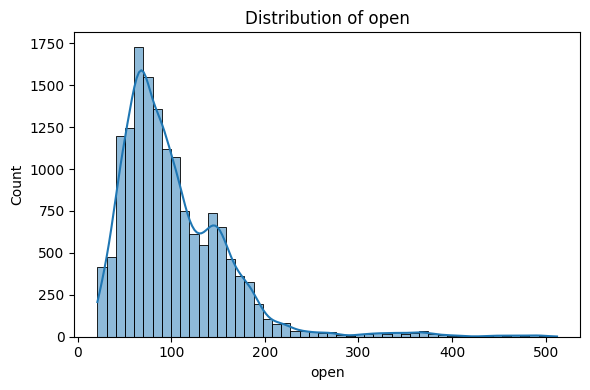

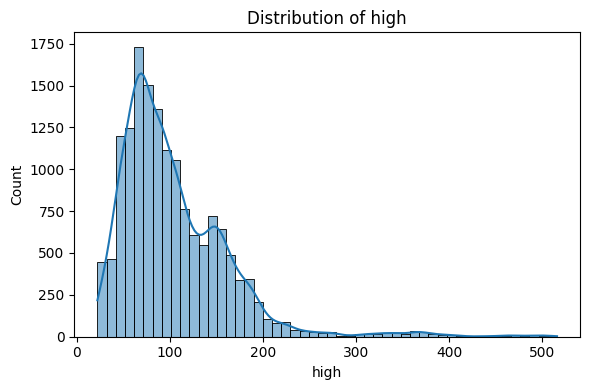

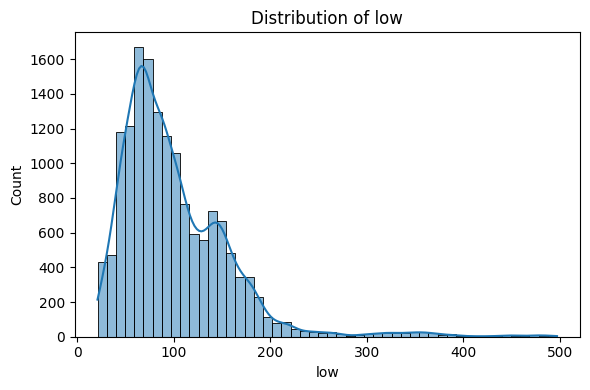

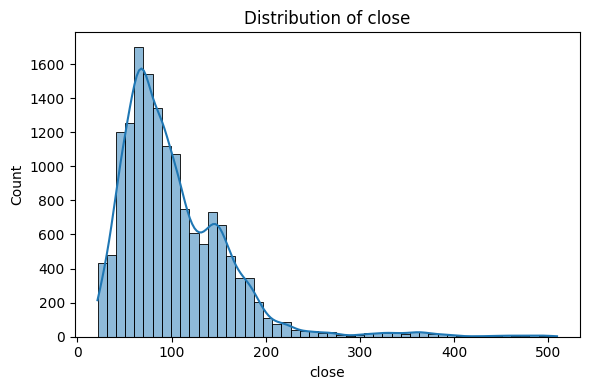

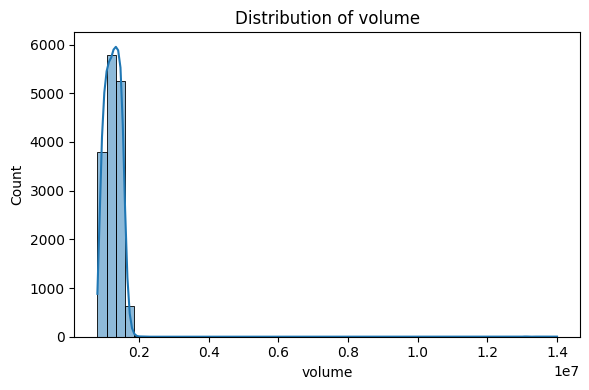

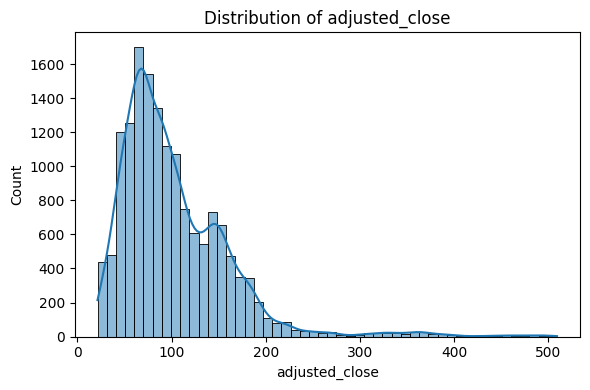

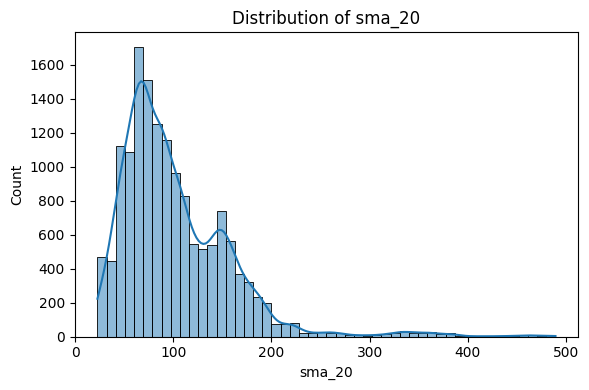

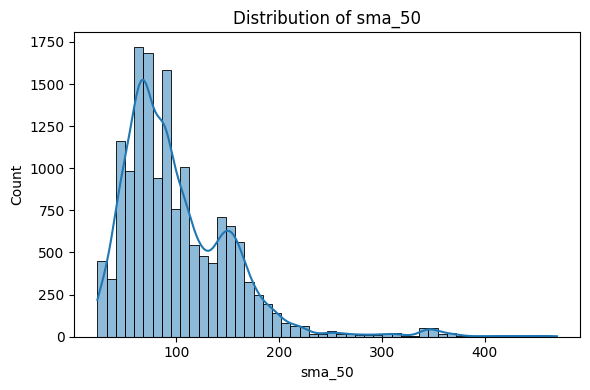

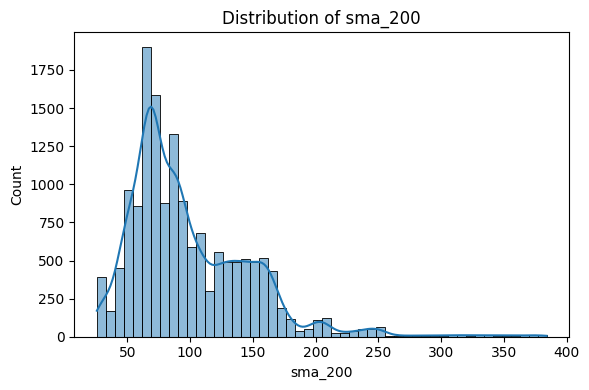

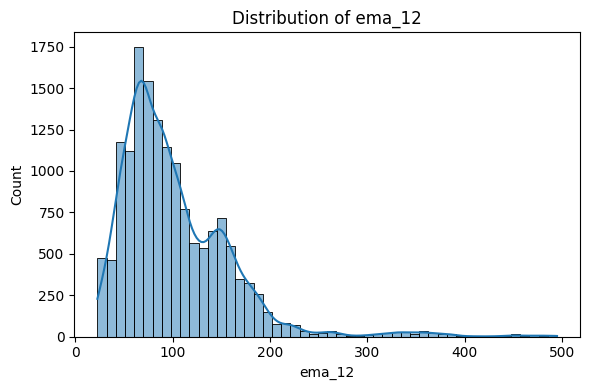

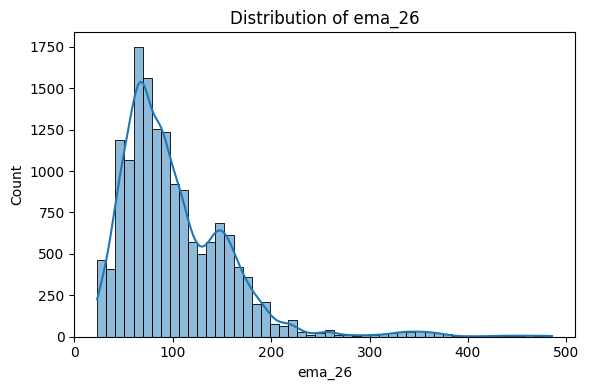

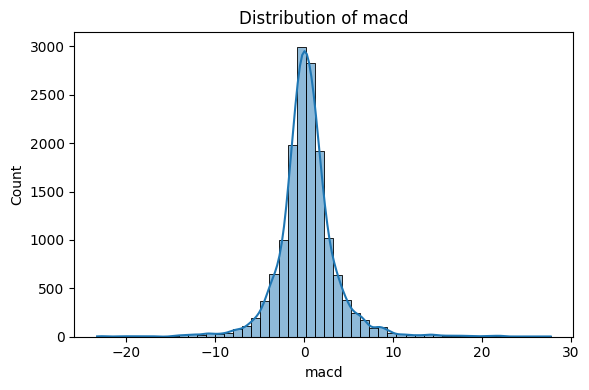

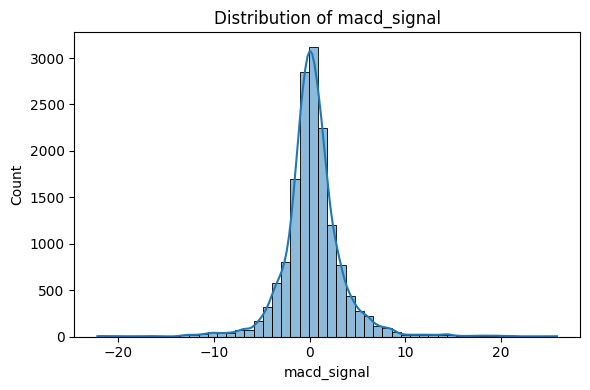

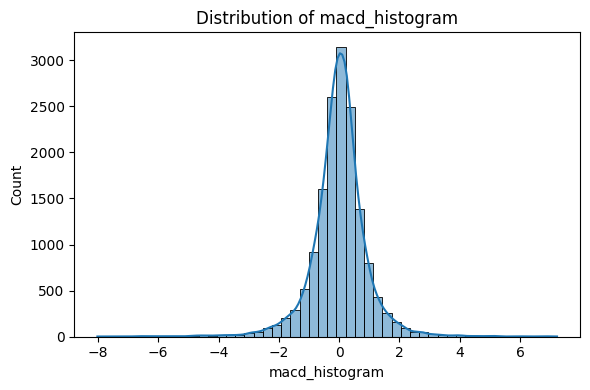

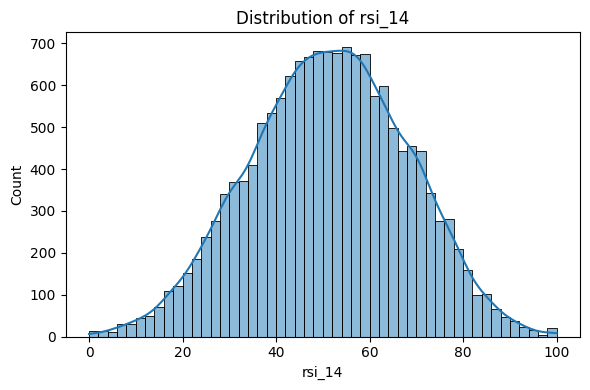

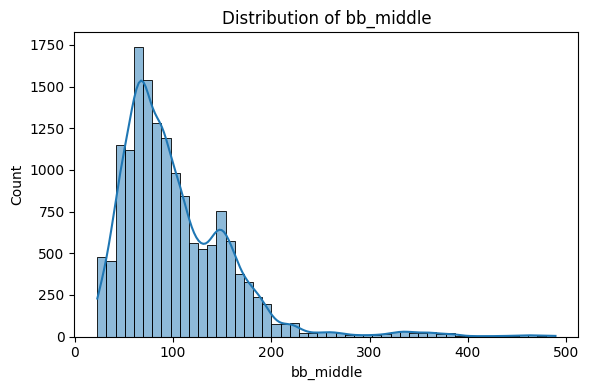

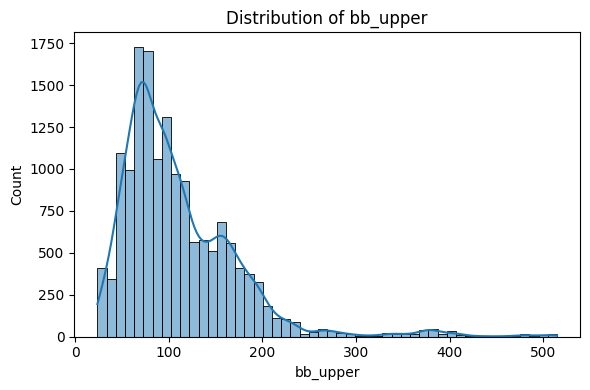

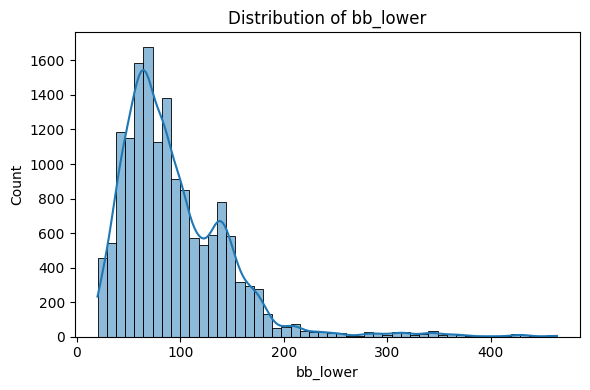

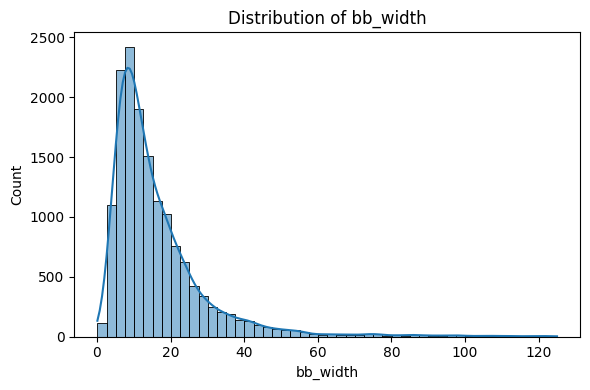

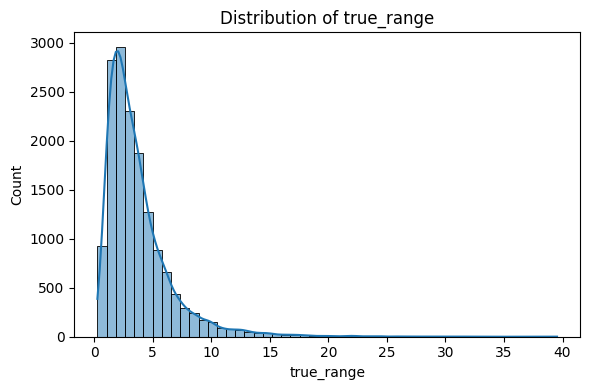

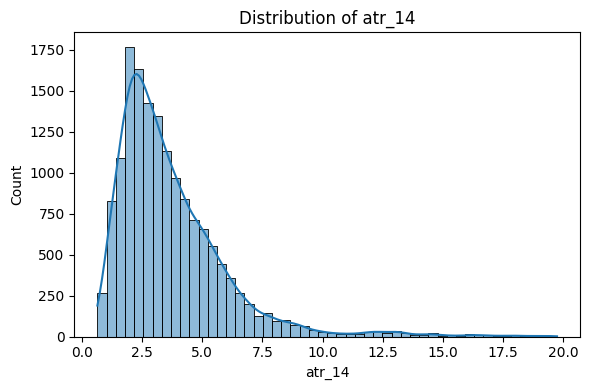

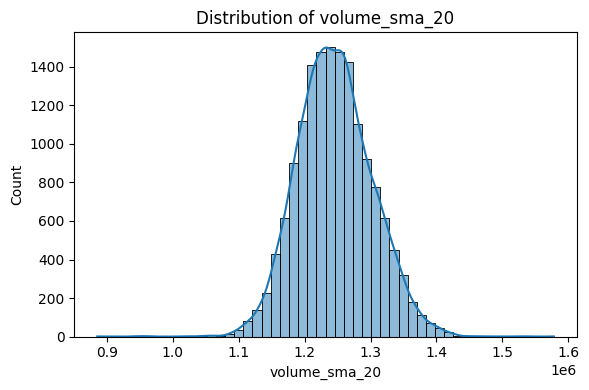

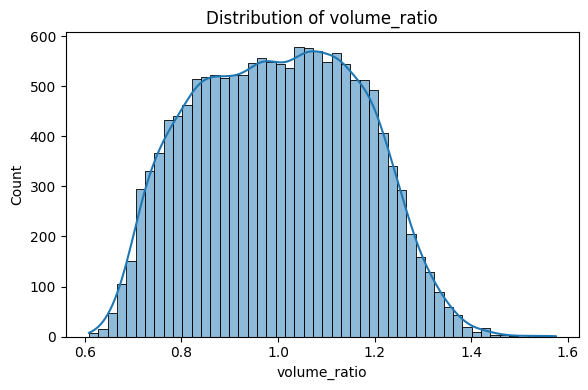

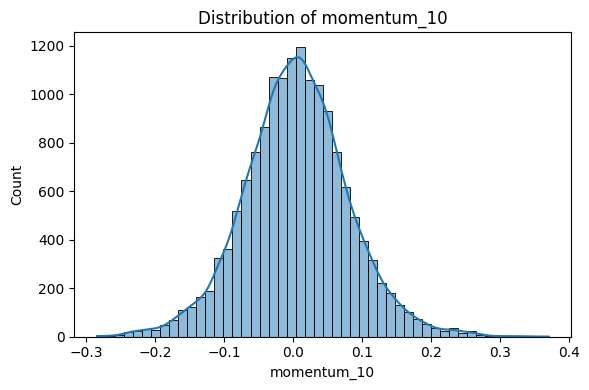

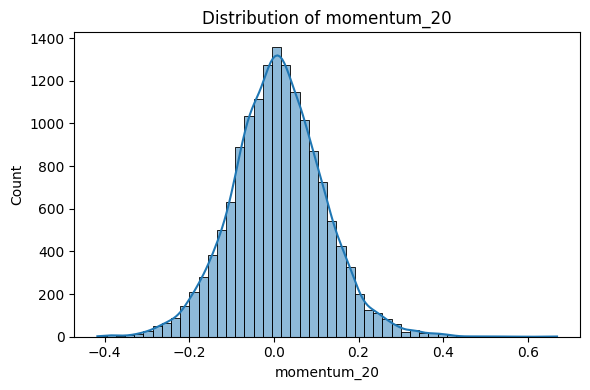

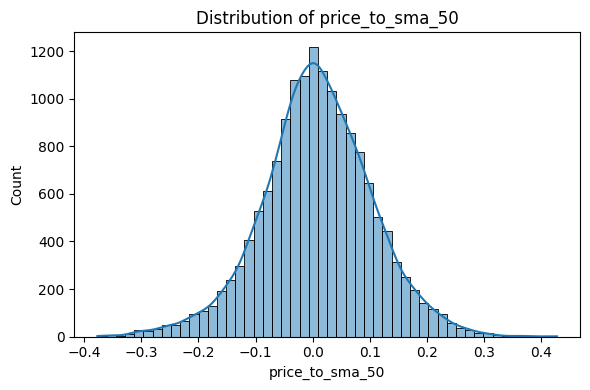

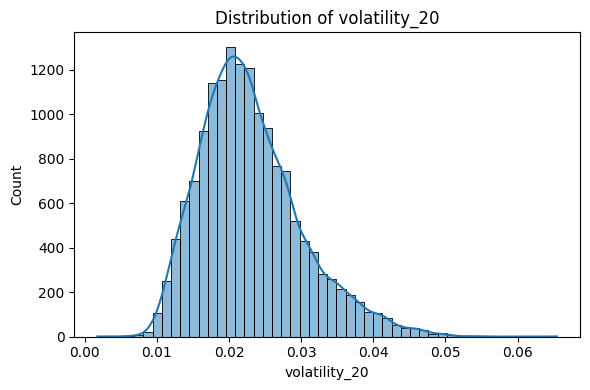

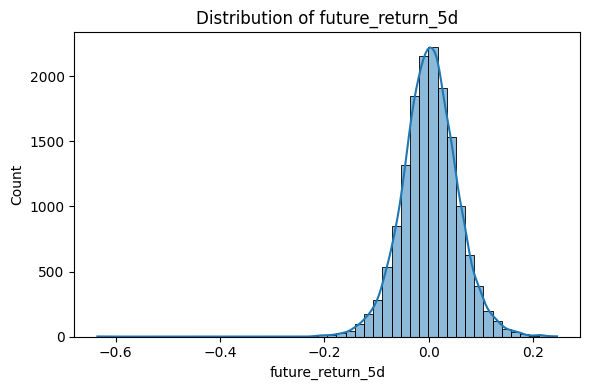

In [38]:
numeric_cols =df_clean.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


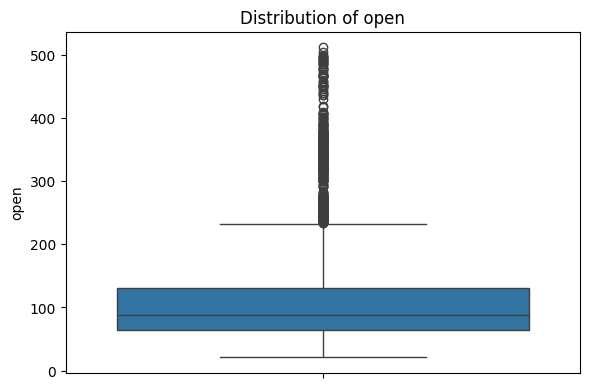

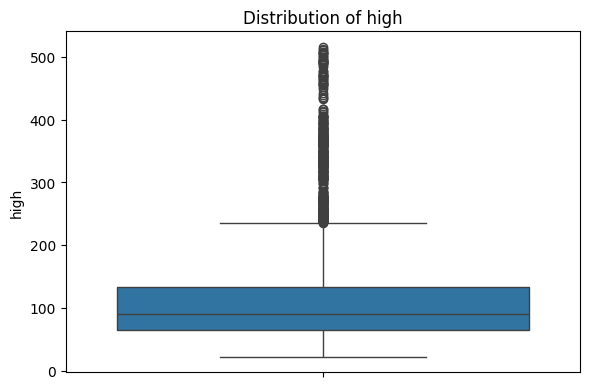

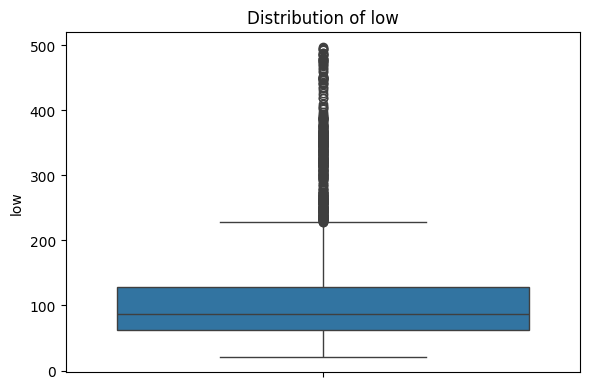

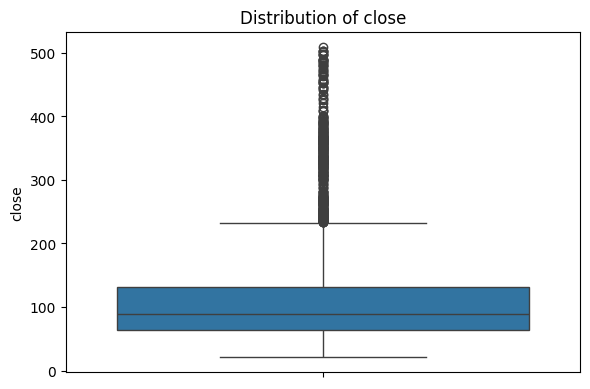

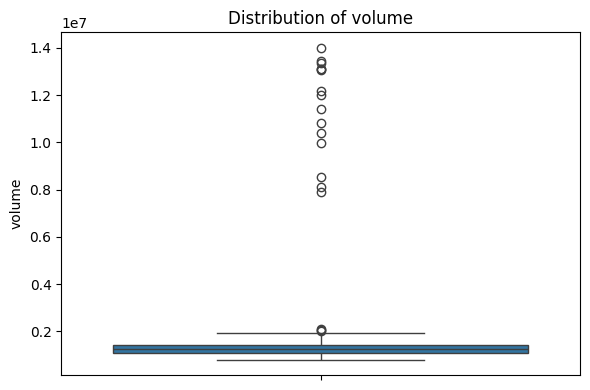

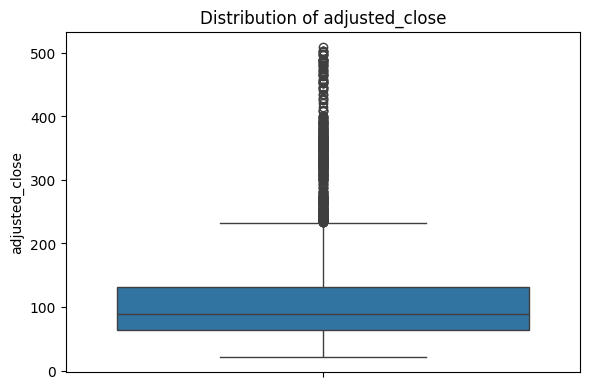

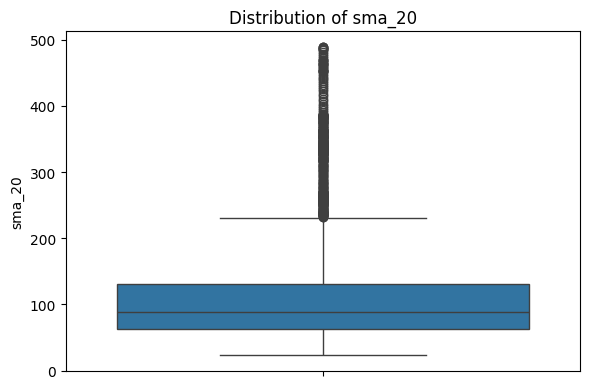

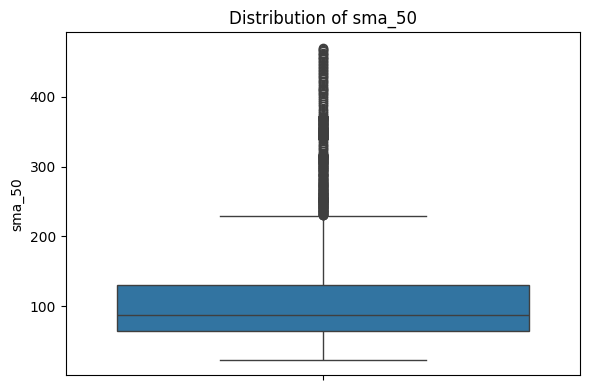

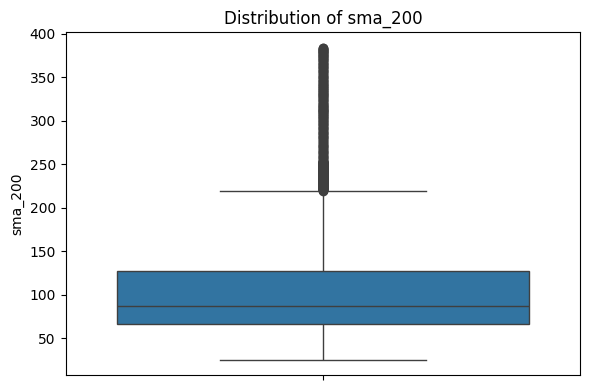

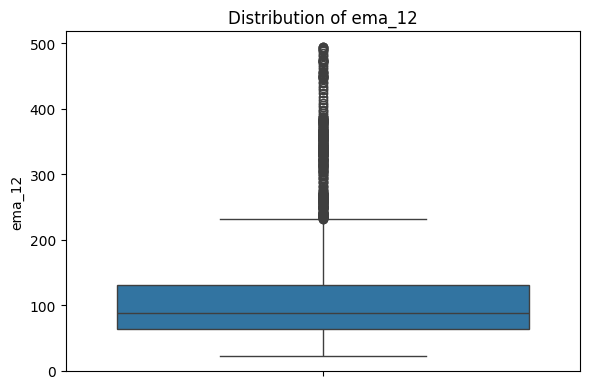

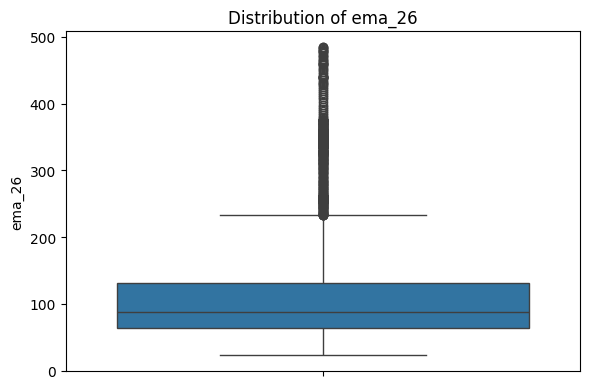

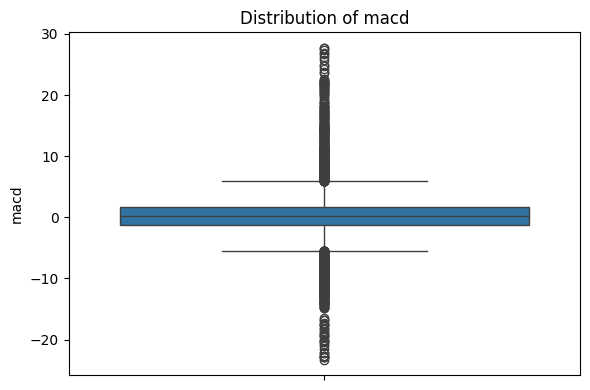

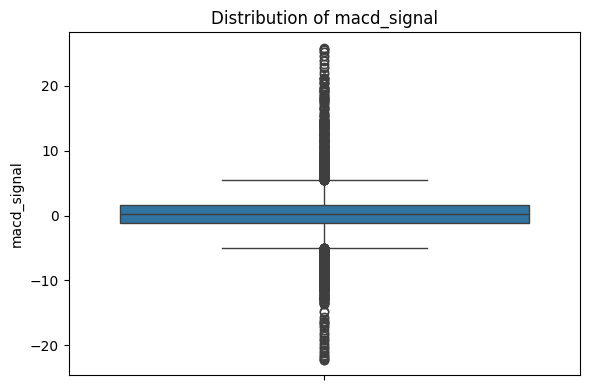

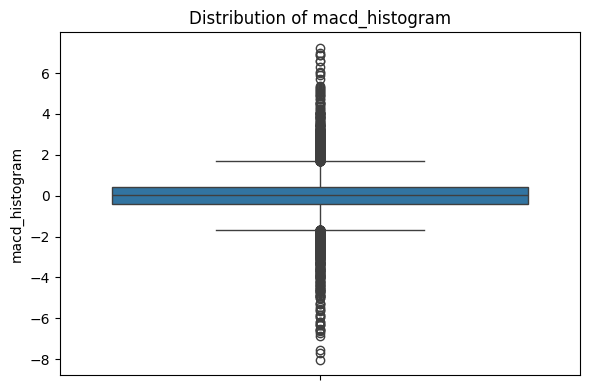

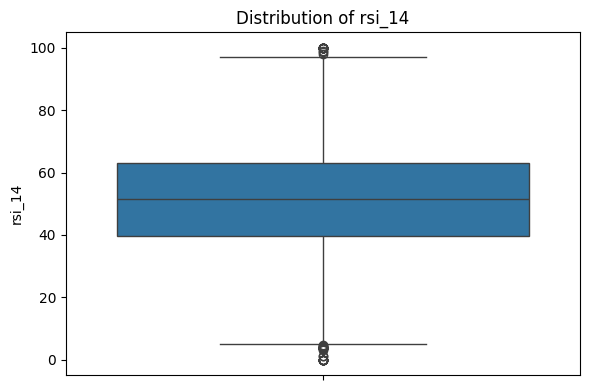

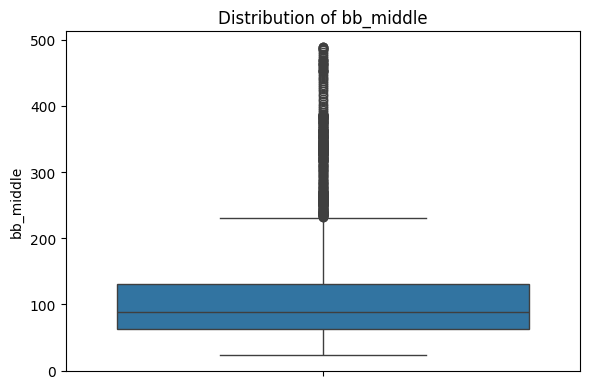

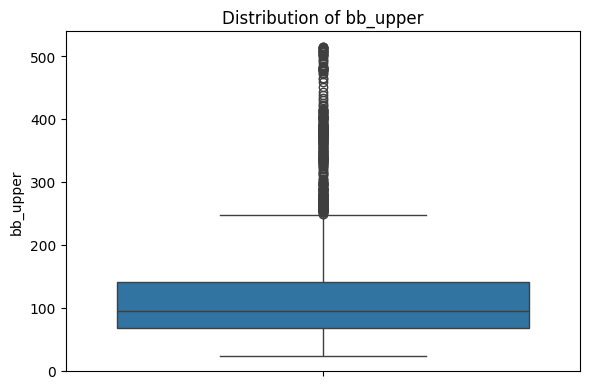

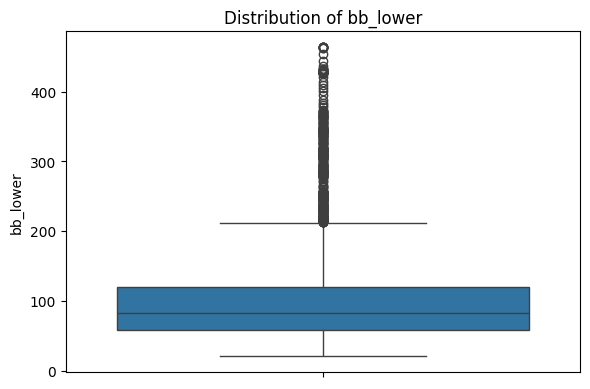

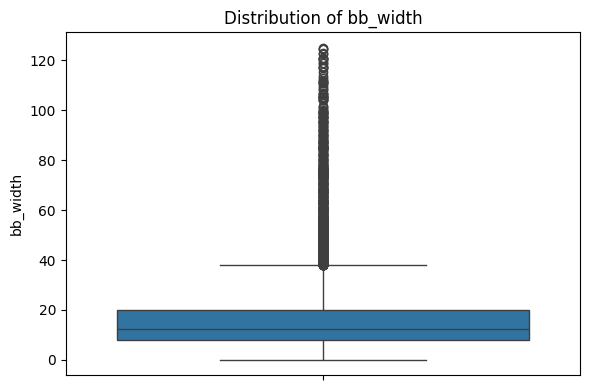

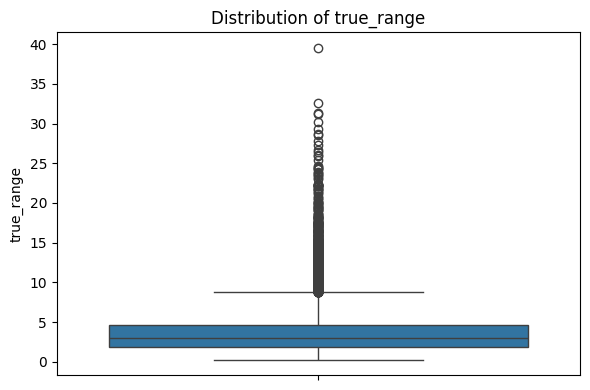

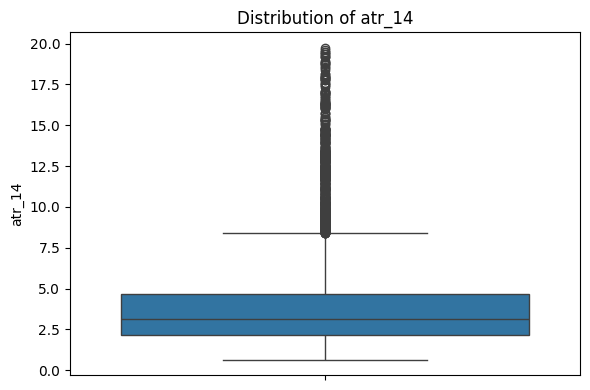

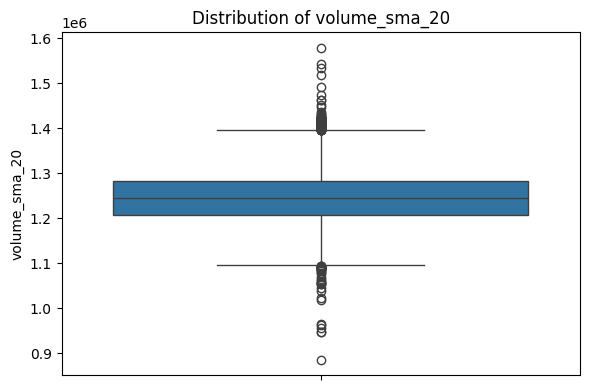

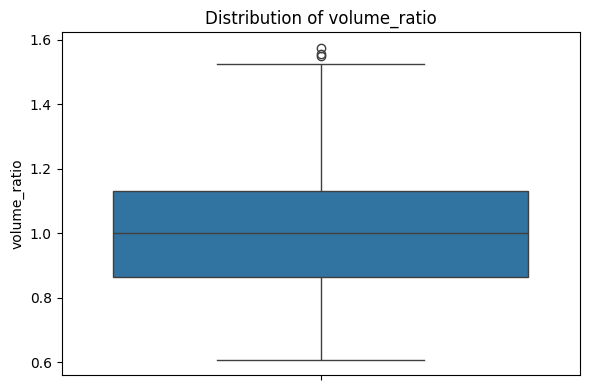

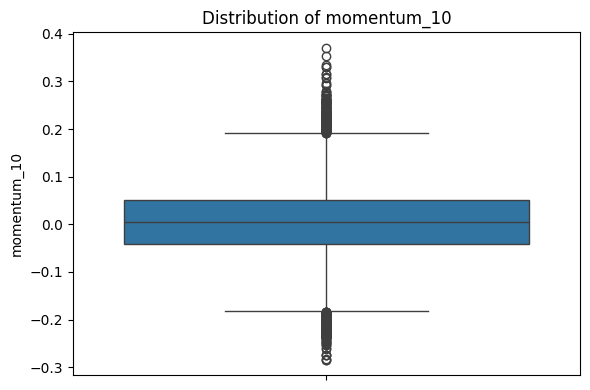

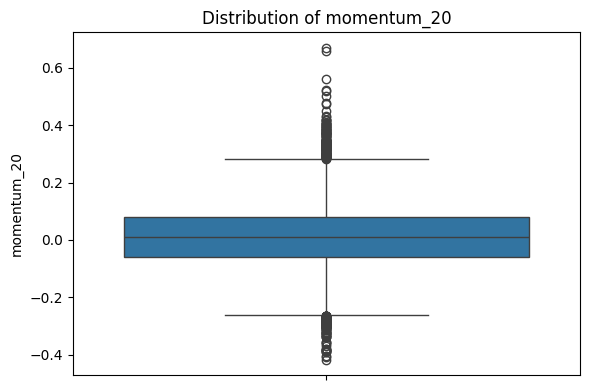

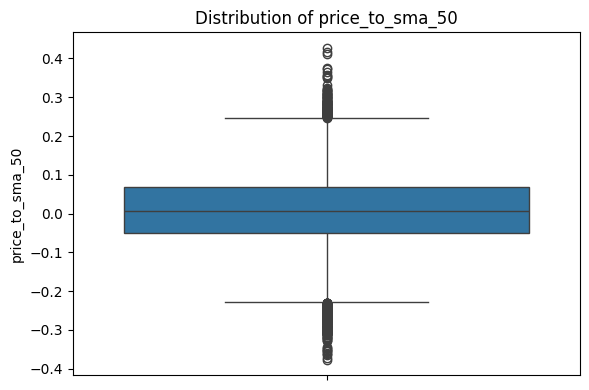

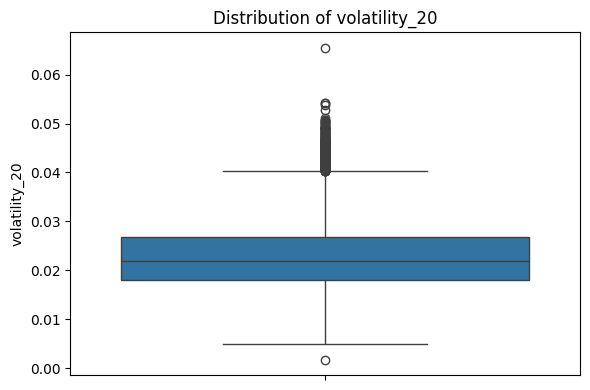

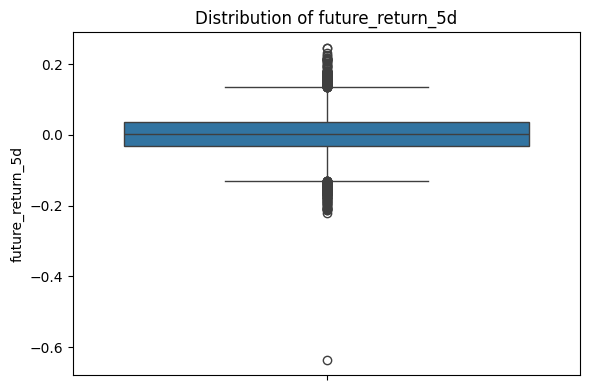

In [39]:
numeric_cols =df_clean.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[col],)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


In [40]:
numeric_cols=df_clean.select_dtypes(include =['float64','int64']).columns

In [41]:
affected_columns= ['open', 'high', 'low', 'close','volume','adjusted_close','sma_20','sma_50','sma_200', 'ema_12', 'ema_26', 'macd', 'macd_signal', 'macd_histogram','rsi_14', 'bb_middle','bb_upper', 'bb_lower', 'bb_width', 'true_range',
'atr_14', 'volume_sma_20', 'volume_ratio','momentum_10', 'momentum_20', 'price_to_sma_50', 'volatility_20', 'future_return_5d']

In [42]:
q1=df_clean[affected_columns].quantile(0.25)
q3= df_clean[affected_columns].quantile(0.75)
iqr= q3-q1
iqr

open                    68.610000
high                    69.460000
low                     67.380000
close                   68.480000
volume              353756.000000
adjusted_close          68.480000
sma_20                  68.358000
sma_50                  66.800000
sma_200                 61.473450
ema_12                  68.455408
ema_26                  68.472492
macd                     2.935711
macd_signal              2.732741
macd_histogram           0.850676
rsi_14                  23.328353
bb_middle               68.358000
bb_upper                72.529110
bb_lower                62.404781
bb_width                12.134169
true_range               2.780000
atr_14                   2.512143
volume_sma_20        75257.700000
volume_ratio             0.268794
momentum_10              0.093633
momentum_20              0.137185
price_to_sma_50          0.123245
volatility_20            0.008916
future_return_5d         0.066837
dtype: float64

In [43]:
lower_bound = q1-1.5*iqr

In [44]:
upper_bound = q3+1.5*iqr

In [45]:
upper_bound

open                2.347250e+02
high                2.380300e+02
low                 2.305900e+02
close               2.344600e+02
volume              1.953545e+06
adjusted_close      2.344600e+02
sma_20              2.337540e+02
sma_50              2.311096e+02
sma_200             2.205402e+02
ema_12              2.338886e+02
ema_26              2.343608e+02
macd                6.097069e+00
macd_signal         5.697487e+00
macd_histogram      1.712061e+00
rsi_14              9.794241e+01
bb_middle           2.337540e+02
bb_upper            2.497707e+02
bb_lower            2.142784e+02
bb_width            3.840511e+01
true_range          8.820000e+00
atr_14              8.444643e+00
volume_sma_20       1.395641e+06
volume_ratio        1.535392e+00
momentum_10         1.922075e-01
momentum_20         2.839211e-01
price_to_sma_50     2.559153e-01
volatility_20       4.032099e-02
future_return_5d    1.362129e-01
dtype: float64

In [46]:
df_clean[affected_columns]=df_clean[affected_columns].clip(lower=lower_bound, upper = upper_bound, axis=1)

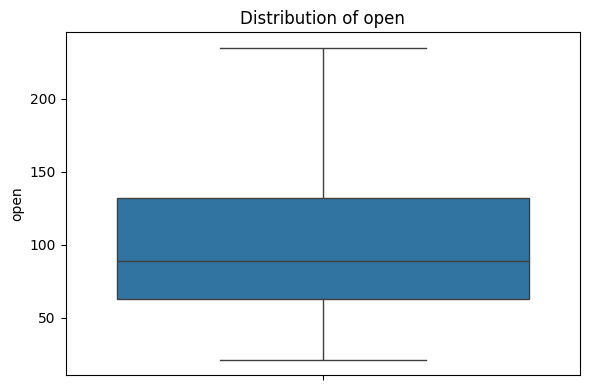

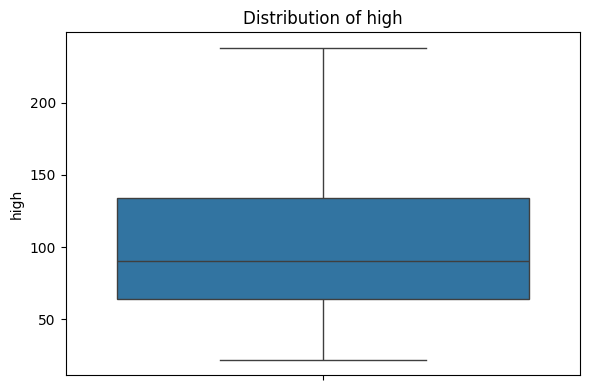

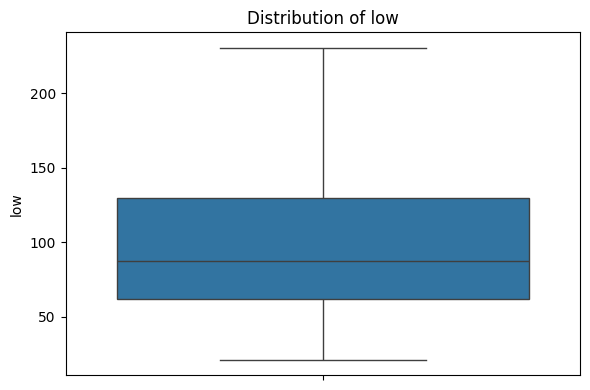

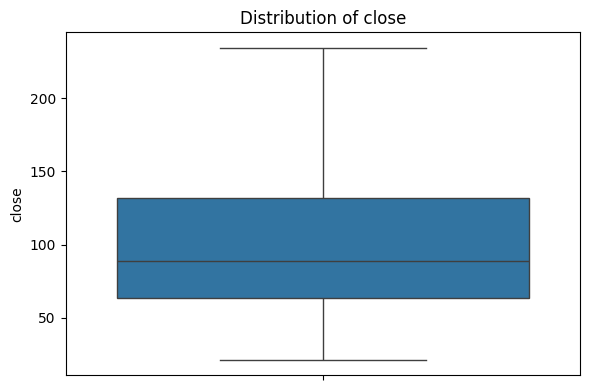

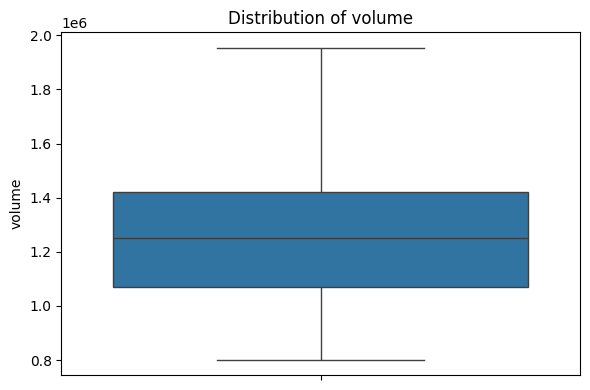

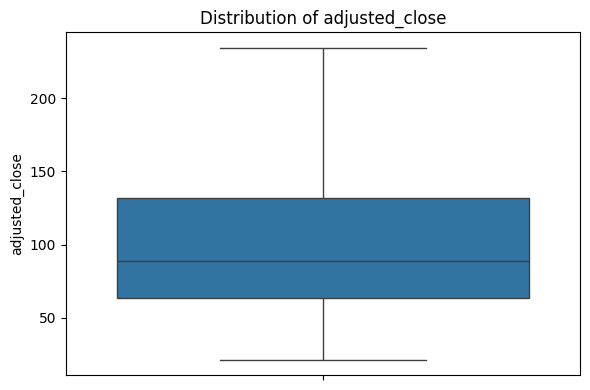

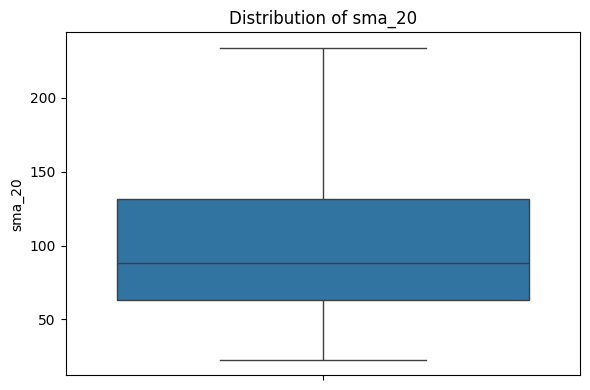

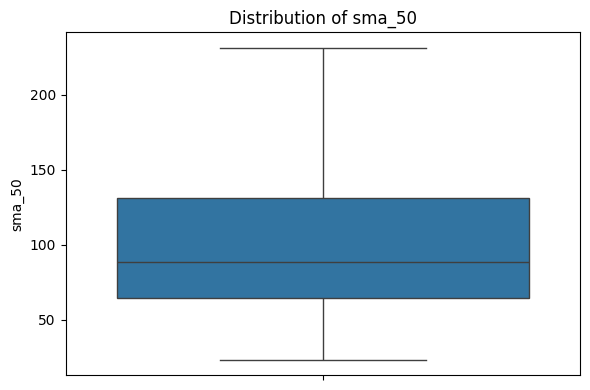

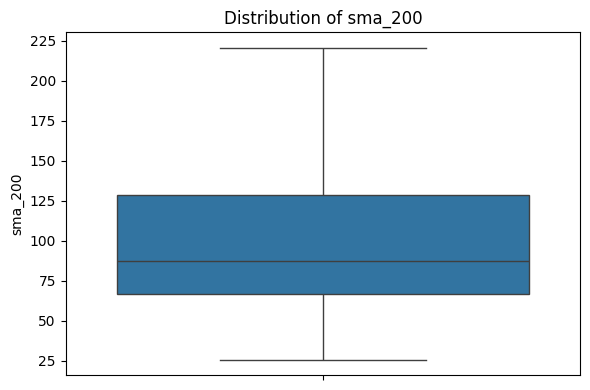

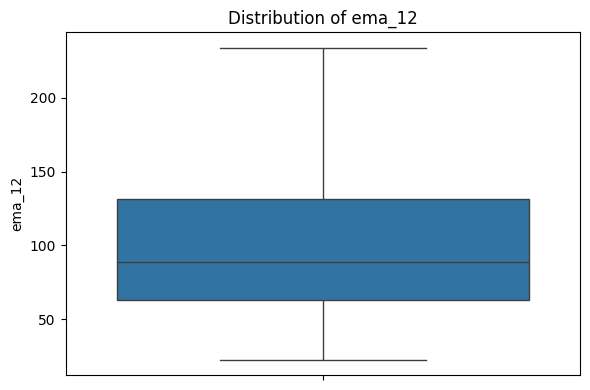

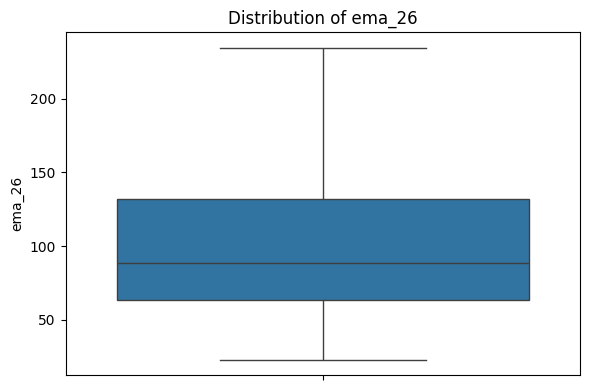

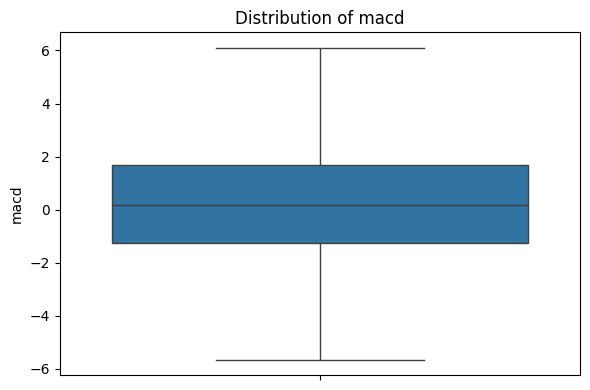

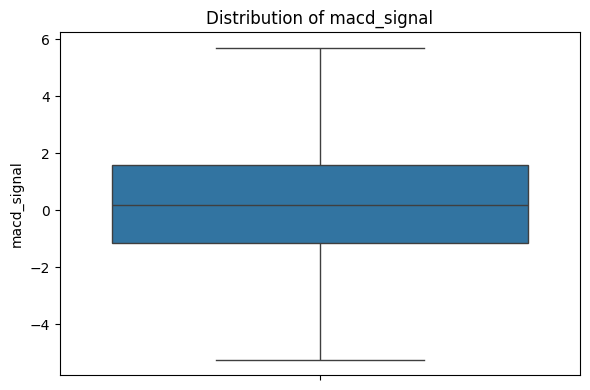

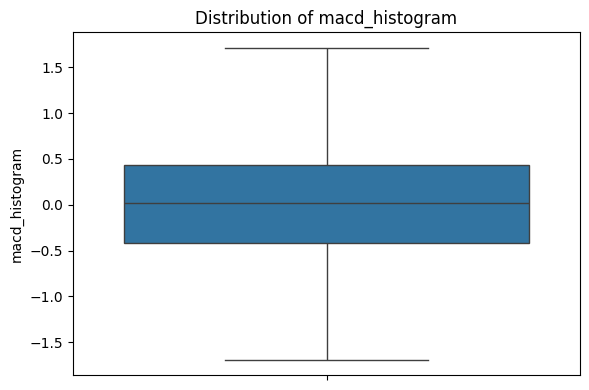

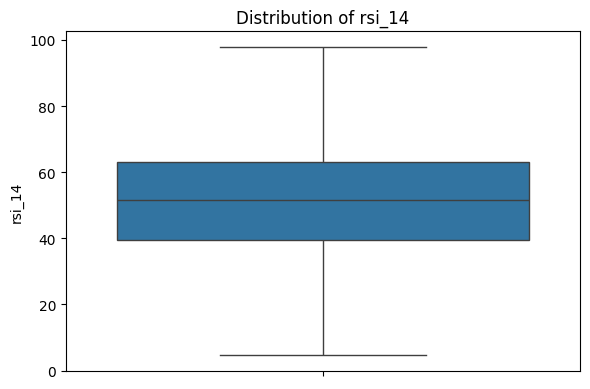

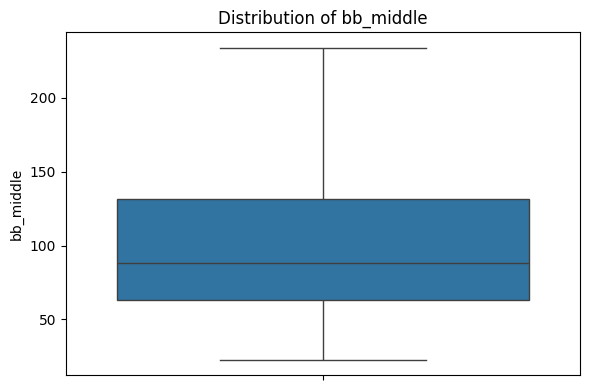

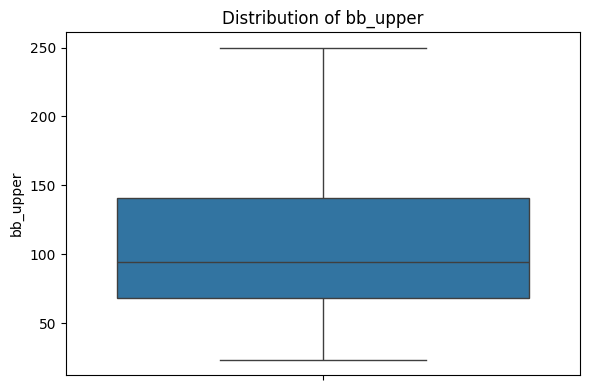

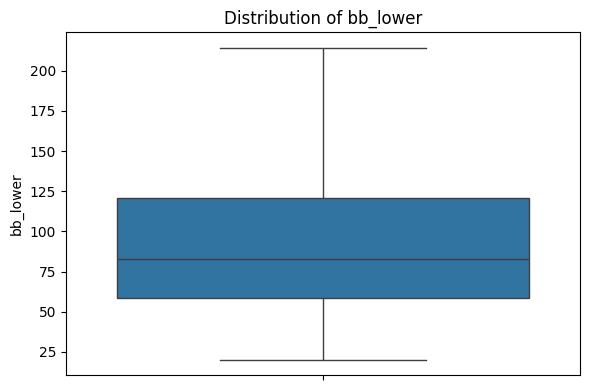

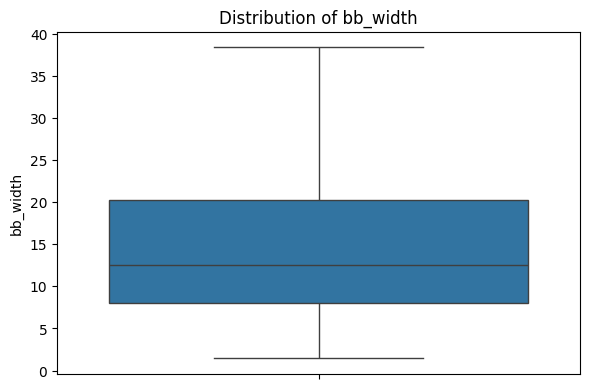

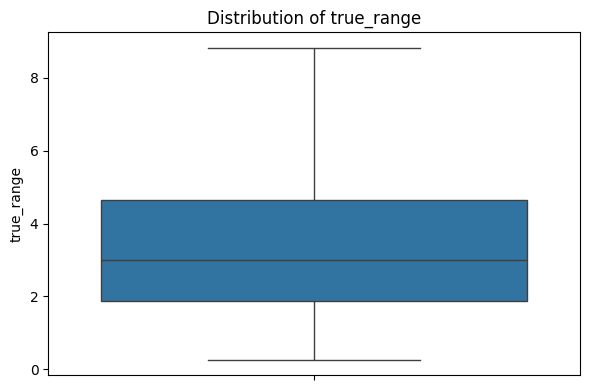

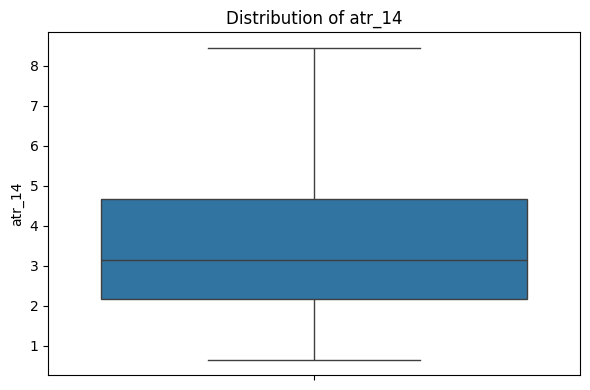

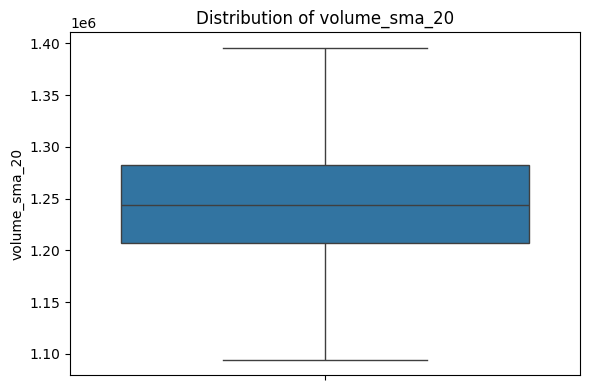

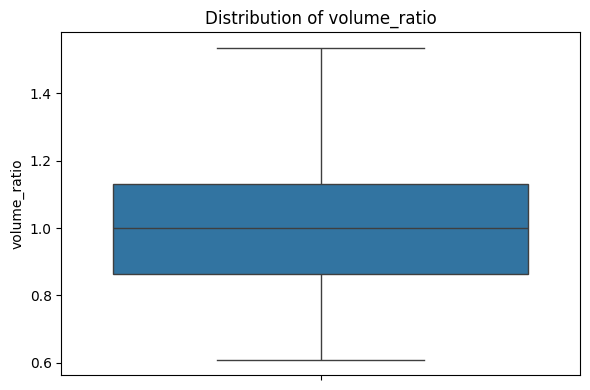

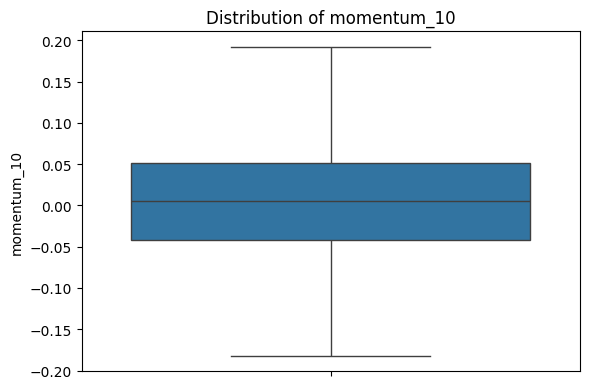

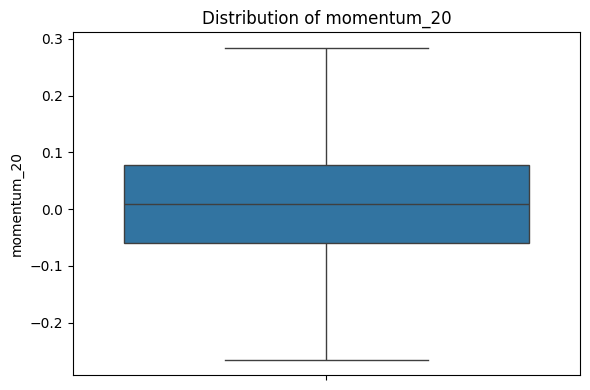

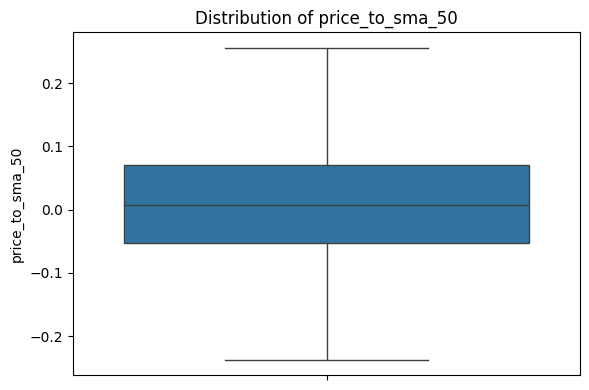

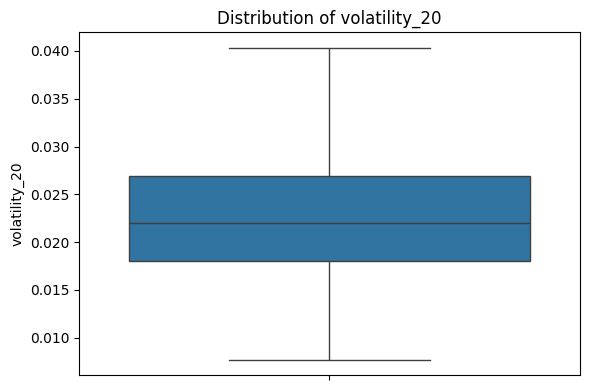

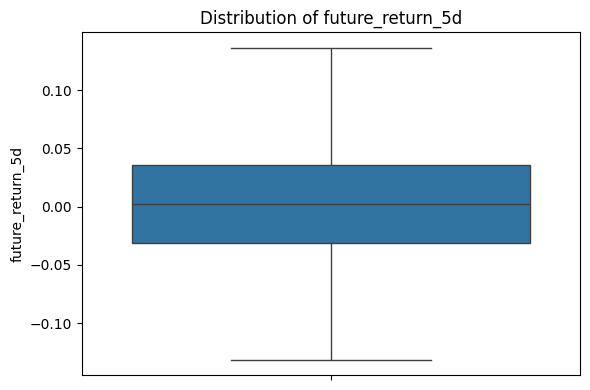

In [47]:
numeric_cols =df_clean.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(df_clean[col],)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


In [48]:
#extract the yr, month and quarter

In [49]:
df_clean['date']=pd.to_datetime(df_clean['date'])

In [50]:
df_clean['year']= df_clean["date"].dt.year

In [51]:
df_clean['month']=df_clean['date'].dt.month

In [52]:
df_clean['month_name'] = df_clean['date'].dt.month_name()

In [53]:
df_clean['quarter'] =df_clean['date'].dt.quarter

In [54]:
df_clean['quarter']=df_clean['date'].dt.quarter

In [55]:
df_clean.head(2)

,ticker,date,open,high,low,close,volume,adjusted_close,sma_20,sma_50,...,momentum_10,momentum_20,price_to_sma_50,volatility_20,future_return_5d,trend_label,year,month,month_name,quarter
0,STK001,2021-02-01,150.74,154.29,150.74,152.81,1467983.0,152.81,157.5925,157.712381,...,-0.037357,-0.045594,-0.031084,0.017942,-0.022512,Downtrend,2021,2,February,1
1,STK001,2021-02-03,151.25,151.25,145.94,148.28,1476629.0,148.28,156.4305,157.080870,...,-0.058958,-0.083447,-0.056028,0.018440,0.016388,Sideways,2021,2,February,1


In [56]:
print("df_clean columns:", df_clean.columns)

df_clean columns: Index(['ticker', 'date', 'open', 'high', 'low', 'close', 'volume',
       'adjusted_close', 'sma_20', 'sma_50', 'sma_200', 'ema_12', 'ema_26',
       'macd', 'macd_signal', 'macd_histogram', 'rsi_14', 'bb_middle',
       'bb_upper', 'bb_lower', 'bb_width', 'true_range', 'atr_14',
       'volume_sma_20', 'volume_ratio', 'momentum_10', 'momentum_20',
       'price_to_sma_50', 'volatility_20', 'future_return_5d', 'trend_label',
       'year', 'month', 'month_name', 'quarter'],
      dtype='object')


In [57]:
pd.read_csv(r"C:\Users\maryn\Downloads\company_info.csv")

,ticker,company_name,sector,ipo_date
0,STK001,TechCorp,Technology,2021-04-10
1,STK002,DataSystems,Technology,2016-10-12
2,STK003,CloudNine,Technology,2016-01-18
3,STK004,CyberShield,Technology,2022-02-21
4,STK005,MediPharm,Healthcare,2018-03-05
5,STK006,BioGenix,Healthcare,2017-12-01
6,STK007,HealthPlus,Healthcare,2017-09-25
7,STK008,CareWell,Healthcare,2017-01-08
8,STK009,CapitalBank,Finance,2022-02-06
9,STK010,InvestPro,Finance,2016-09-15


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
stock_data=pd.read_csv(r"C:\Users\maryn\Downloads\stock_prices_with_indicators.csv")
company_data=pd.read_csv(r"C:\Users\maryn\Downloads\company_info.csv")
# perform the merge and assign it to a variable
merged =pd.merge(stock_data, company_data, on="ticker",how='left')


In [60]:
# save result

In [61]:

merged.to_csv('merged_stock_data.csv', index=False)
print(f"merged{len(stock_data)}stock records with company info")

merged15502stock records with company info


In [62]:
df=pd.read_csv("merged_stock_data.csv")

In [63]:
# covert date column to date time

In [64]:
df['date']=pd.to_datetime(df['date'])

In [65]:
# Closing prices for 5 different stocks one for each sector)

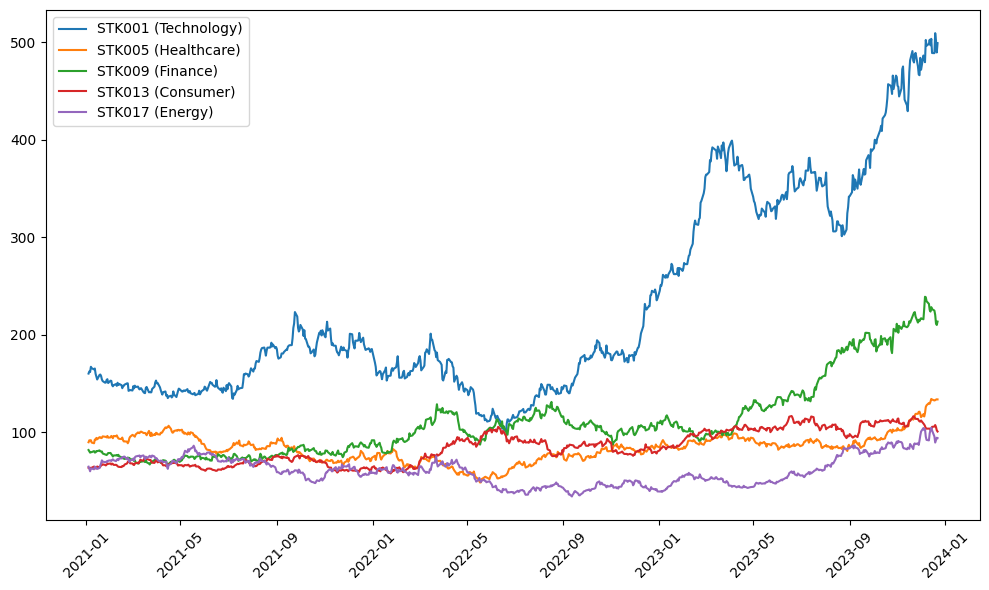

In [66]:
fig, ax= plt.subplots(figsize=(10,6))
for sector in df['sector'].unique()[:5]:
    ticker=df[df['sector']==sector]['ticker'].iloc[0]
    data=df[df['ticker']==ticker]
    ax.plot(data['date'],data['close'],label
    =f"{ticker} ({sector})")
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
# Technology is leading

In [68]:
# identify uptends, downtrends and sideways periods visually

In [69]:
df['date']=pd.to_datetime(df['date'])

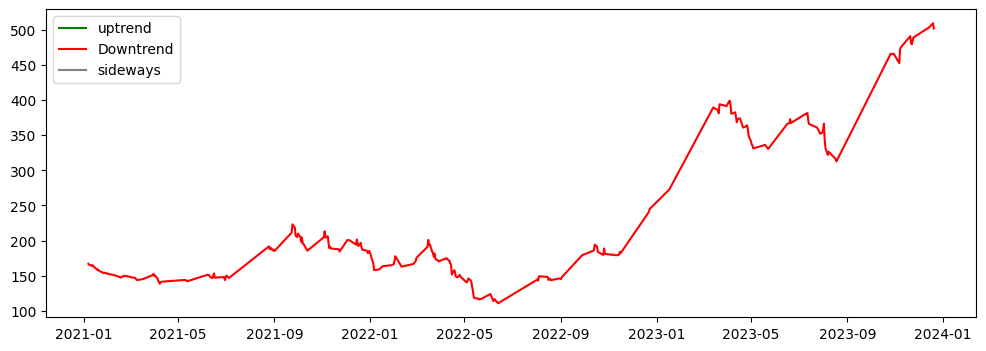

In [70]:
stock=df[df['ticker']==df['ticker'].iloc[0]]
colors={'uptrend':'green','Downtrend': 'red',"sideways":'gray'}
plt.figure(figsize=(12,4))
for trend, color in colors.items():
    data= stock[stock['trend_label']==trend]
    plt.plot(data['date'],data['close'], 
             color = color, label=trend)
plt.legend()
plt.show()

In [71]:
#plot shows a down trend period

In [72]:
# Basic return statistics

In [73]:
# select numeric cols for analysis

In [74]:
numeric_cols=['close', 'volume','future_return_5d','rsi-14', 'volatility_20']
print("BASIC STATISTICS")
print("="*50)
for col in numeric_cols:
     if col in df.columns:
              mean_val=df[col].mean()
              median_val=df[col].median()
              std_val=df[col].std()
              print(f"{col:15}|mean:{mean_val:8.2f}|median:{median_val:8.2f}|std:{std_val:8.2f}")
        

BASIC STATISTICS
close          |mean:  102.45|median:   88.65|std:   58.58
volume         |mean:1255806.35|median:1249854.00|std:388042.56
future_return_5d|mean:    0.00|median:    0.00|std:    0.05
volatility_20  |mean:    0.02|median:    0.02|std:    0.01


In [75]:
# mean= Average value
#median = middle value(50th percentile)
#standard deviation: measure of variability/ spread

In [76]:
df= pd.read_csv('merged_stock_data.csv')

In [77]:
#Calculate Average returns by sector

In [78]:
avg_returns=df.groupby('sector') ['future_return_5d'].mean()
#print each sector and its average return
for sector, return_value in avg_returns.items():
    print(f"{sector}:{return_value:.4f}({return_value*100:.2f}%)")

Consumer:0.0026(0.26%)
Energy:0.0016(0.16%)
Finance:0.0036(0.36%)
Healthcare:0.0022(0.22%)
Technology:0.0023(0.23%)


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
stock_data=pd.read_csv(r"C:\Users\maryn\Downloads\stock_prices_with_indicators.csv")
company_data=pd.read_csv(r"C:\Users\maryn\Downloads\company_info.csv")
merged=pd.merge(stock_data, company_data, on ="ticker", how = 'left')

In [81]:
# save result

In [82]:
merged.to_csv('merged_stock_data.csv', index=False)
print(f"merged{len(stock_data)}stock records with company info")

merged15502stock records with company info


In [83]:
df= pd.read_csv('merged_stock_data.csv')

In [84]:
# plot average returns

In [85]:
# plot Volatility

In [86]:
Volatility_by_sector=df.groupby('sector')['volatility_20'].mean().round(4)
print('Average Volatility by sector:')
print(Volatility_by_sector.sort_values(ascending=False))

Average Volatility by sector:
sector
Energy        0.0302
Technology    0.0243
Finance       0.0223
Healthcare    0.0202
Consumer      0.0179
Name: volatility_20, dtype: float64


In [87]:
df=pd.read_csv('merged_stock_data.csv')

In [88]:
df.head(2)

,ticker,date,open,high,low,close,volume,adjusted_close,sma_20,sma_50,...,volume_ratio,momentum_10,momentum_20,price_to_sma_50,volatility_20,future_return_5d,trend_label,company_name,sector,ipo_date
0,STK001,2021-01-04,158.09,160.97,158.09,160.11,962644.0,160.11,160.110,160.110,...,1.000000,NaN,NaN,0.000000,NaN,0.026357,Uptrend,TechCorp,Technology,2021-04-10
1,STK001,2021-01-05,163.16,165.50,160.76,162.36,1312685.0,162.36,161.235,161.235,...,1.153842,NaN,NaN,0.006977,NaN,0.018169,Sideways,TechCorp,Technology,2021-04-10


In [89]:
# create boxplot for returns by sector

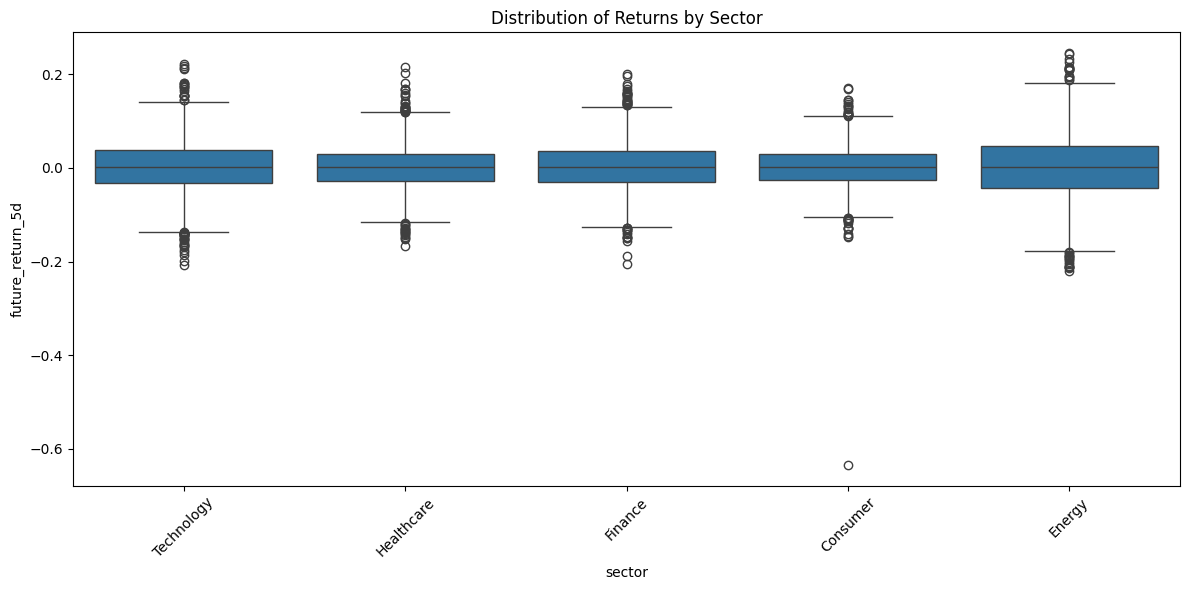

In [90]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x = 'sector', y= 'future_return_5d')
plt.title('Distribution of Returns by Sector')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [91]:
#Volume Analysis

High vol days:17|Avg price change:-0.020


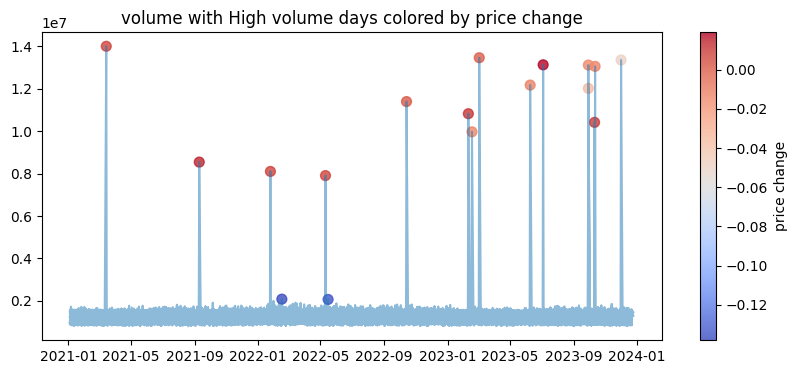

In [92]:
df['date']=pd.to_datetime(df['date'])
df['high_vol']=df['volume']>df['volume'].mean()+2*df['volume'].std()
df['pct_change']=df['close'].pct_change()
high_vol=df[df['high_vol']]
print(f"High vol days:{len(high_vol)}|Avg price change:{high_vol['pct_change'].mean():.3f}")
plt.figure(figsize=(10,4))
plt.plot(df['date'],df['volume'],alpha=0.5)
plt.scatter(high_vol['date'], high_vol['volume'],c=high_vol['pct_change'],
            cmap='coolwarm', s=50, alpha=0.8)
plt.colorbar(label='price change')
plt.title('volume with High volume days colored by price change')
plt.show()

In [93]:
# High Volume days marked in red. it shows that High Volume often accompanies significant price moves

In [94]:
# Calculate various price movements

In [95]:
df['price_change']=df.groupby('ticker')['close'].pct_change()
df['abs_price_change']=df['price_change'].abs()
df['price_change_direction']=np.sign(df['price_change'])
print("CORRELATION ANALYSIS: Volume vs Price movement")
print("-"*50)

CORRELATION ANALYSIS: Volume vs Price movement
--------------------------------------------------


In [96]:
# Different Correlation measures


In [97]:
corr_abs=df['volume'].corr(df['abs_price_change'])
corr_raw=df['volume'].corr(df['price_change'])
corr_direction=df['volume'].corr(df['price_change_direction'])
print(f"volume vs Absolute price change:{corr_abs:.4f}")
print(f"volume vs Raw price change:{corr_raw:.4f}")
print(f"Volume vs Price Direction(-1/0/1):{corr_direction:.4f}")

volume vs Absolute price change:0.1934
volume vs Raw price change:-0.0136
Volume vs Price Direction(-1/0/1):-0.0084


In [98]:
# check by ticker

In [99]:
print("\nBy Ticker(Volume vs Absolute price change):")
for ticker in df['ticker'].unique():
          ticker_data = df[df['ticker']==ticker].dropna()
          corr= ticker_data['volume'].corr(ticker_data['abs_price_change'])
          print(f"{ticker}:{corr:.4f}")


By Ticker(Volume vs Absolute price change):
STK001:0.0855
STK002:0.3698
STK003:0.3513
STK004:0.3720
STK005:0.1753
STK006:0.2087
STK007:0.3042
STK008:0.1227
STK009:0.0863
STK010:0.1384
STK011:0.3304
STK012:0.0905
STK013:0.2155
STK014:0.2892
STK015:0.2650
STK016:0.1582
STK017:0.4509
STK018:0.4762
STK019:0.1635
STK020:0.1856


In [100]:
# positive correlation: higher volume tends to accompany larger price moves

In [101]:
# RSI patterns and identify overbought/ oversold conditions

In [102]:
def calculate_rsi(data, window=14):
    delta=data.diff()
    gain=delta.where(delta > 0,0)
    loss = -delta.where(delta<0,0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain/avg_loss
    rsi = 100-(100/(1+rs))
    return rsi

In [103]:


# Add RSI colum to dataframe(assuming'close' is your price column)
df['rsi-14'] = calculate_rsi(df['close'])
   

In [104]:
overbought = len(df[df['rsi-14']>70])
oversold= len(df[df['rsi-14']<30])
print(f"RSI>70:{overbought} times,RSI<30:{oversold}times")
              

RSI>70:2187 times,RSI<30:1839times


In [105]:
# with RSI distribution

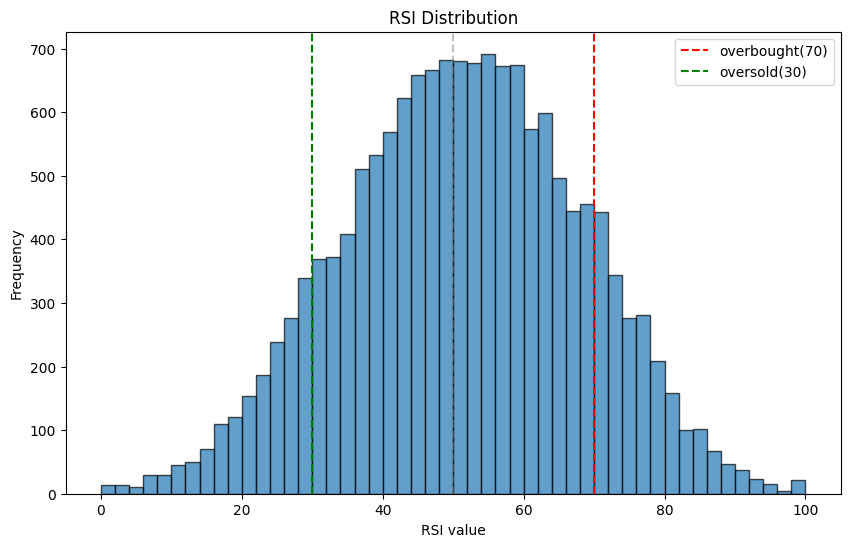

In [106]:
plt.figure(figsize=(10,6))
plt.hist(df['rsi_14'].dropna(), bins=50, alpha=0.7, edgecolor='black')
plt.axvline(70, color = 'red', linestyle='--', label='overbought(70)')
plt.axvline(30,color='green',linestyle='--', label='oversold(30)')
plt.axvline(50, color='gray',linestyle='--',alpha=0.5)
plt.title('RSI Distribution')
plt.xlabel('RSI value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [107]:
import pandas as pd
import matplotlib.pyplot as plt


In [108]:
df=pd.read_csv('cleaned_data.csv')

In [109]:
df['date']=pd.to_datetime(df['date'])

In [110]:
#MACD CROSSOVERS

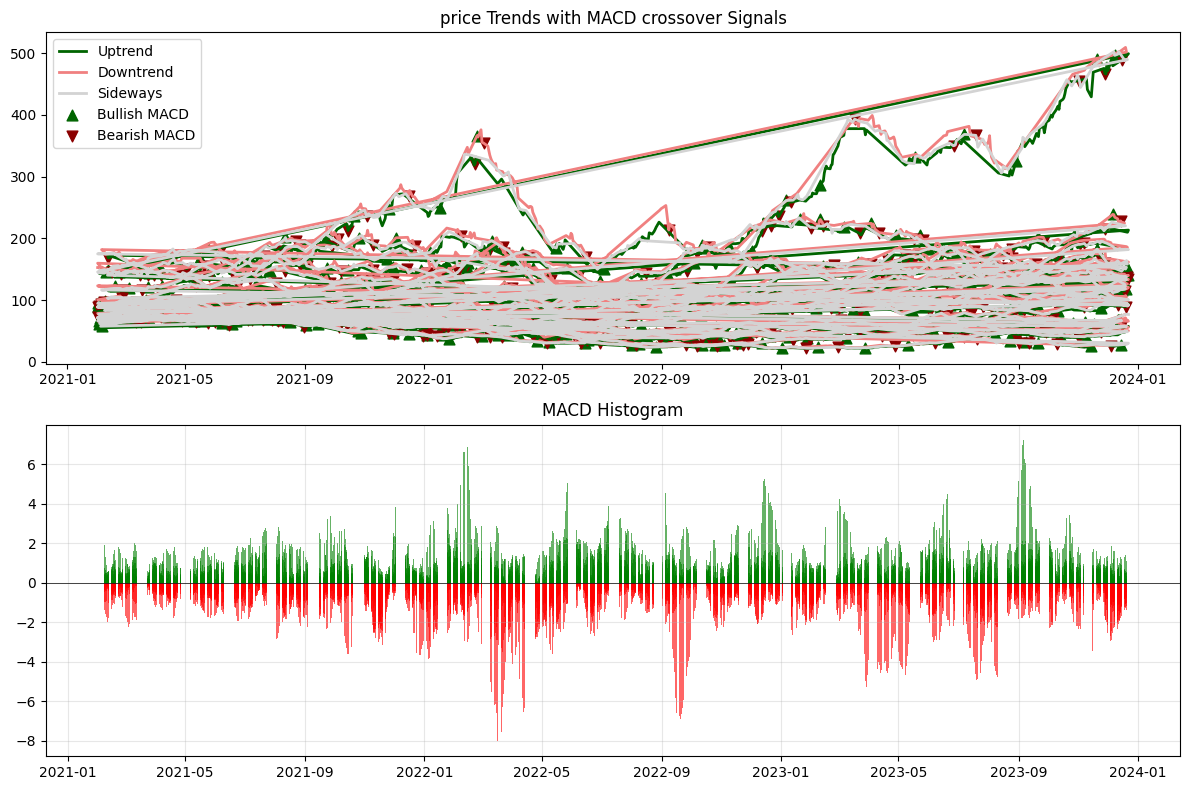

Bullish signals during uptrends:0
Bullish signals during downtrends:180


In [111]:
df['bullish_cross']=(df['macd'] > df['macd_signal'])& (df['macd'].shift(1)< df['macd_signal'].shift(1))
df['bearish_cross']=(df['macd'] < df['macd_signal'])& (df['macd'].shift(1)> df['macd_signal'].shift(1))
#plot
fig,(ax1,ax2)= plt.subplots(2,1,figsize = (12,8))
#price with trend colors and MACD signals 
colors= {'Uptrend':'darkgreen', 'Downtrend':'lightcoral', 'Sideways': 'lightgray'} 
for trend, color in colors.items():
    trend_data= df[df['trend_label']==trend]
    ax1.plot(trend_data['date'], trend_data['close'], color=color,linewidth=2,label=trend)
    
bullish=df[df['bullish_cross']]
bearish=df[df['bearish_cross']]

ax1.scatter(bullish['date'], bullish['close'],color='darkgreen',s=60, marker='^', label='Bullish MACD')
ax1.scatter(bearish['date'], bearish['close'],color='darkred',s=60, marker='v',label='Bearish MACD')
ax1.set_title('price Trends with MACD crossover Signals')
ax1.legend()

    
ax2.bar(df['date'],df['macd_histogram'], color=df['macd_histogram'].apply(lambda x:'green' if x>0 else 'red'), alpha =0.6)
ax2.axhline(y=0,color='black',linewidth=0.5)
ax2.set_title('MACD Histogram')
ax2.grid(True,alpha=0.3)

plt.tight_layout()
plt.show()
    
print(f"Bullish signals during uptrends:{len(bullish[bullish['trend_label']=='uptrend'])}")
print(f"Bullish signals during downtrends:{len(bullish[bullish['trend_label']=='Downtrend'])}")

In [112]:
# Calculate Bollinger Bands

In [113]:
def calc_bollinger_bands(df,window=20):
    df['bb_middle']= df['close'].rolling(window).std()
    df['bb_std']= df['close'].rolling(window).std()
    df['bb_upper']= df['bb_middle'] + 2*df['bb_std']
    df['bb_lower'] = df['bb_middle'] - 2*df['bb_std']
    df['bb_width'] = df['bb_upper']-df['bb_lower']
    df['bb_position']=(df['close']-df['bb_lower'])/df['bb_width']
    return df
    df=calc_bollinger_bands(df)
    

In [114]:
# identify key patterns

In [115]:
df['squeeze']=df['bb_width']< df['bb_width'].quantile(0.2)
df['touch_upper'] = (df['high']>= df['bb_upper'])|(df['close']>=df['bb_upper']*0.995)
df['touch_lower']=(df['low']<=df['bb_lower'])|(df['close']<=df['bb_lower']*1.005)

In [116]:
# plot

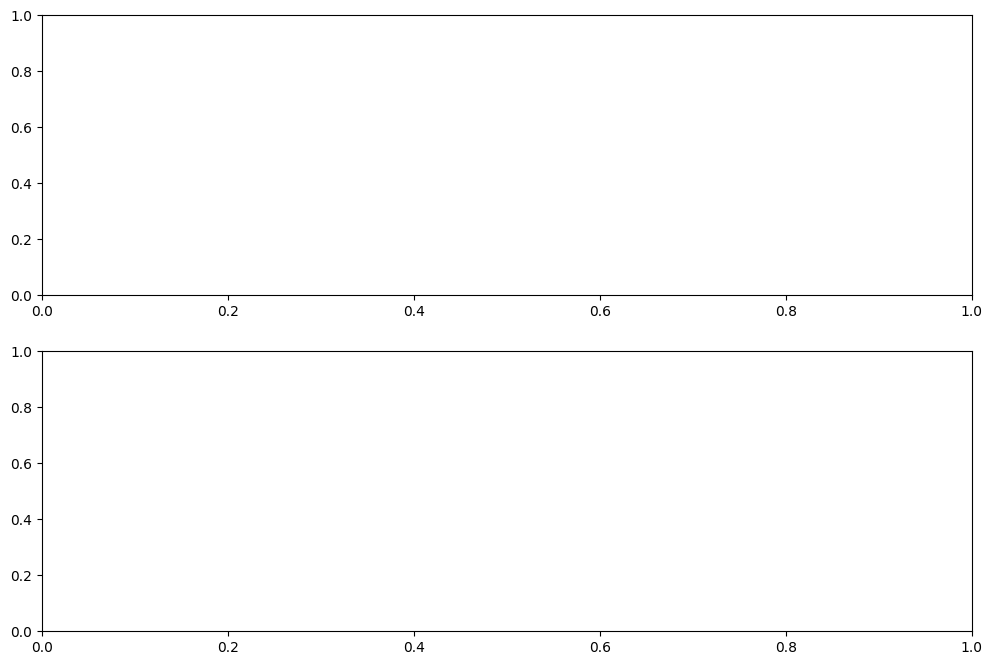

In [117]:
fig,(ax1,ax2)= plt.subplots(2,1,figsize=(12,8))

In [118]:
# price with Bollinger Bands

In [119]:
ax1.plot(df['date'],df['close'], 'k-', label= 'price')
ax1.plot(df['date'],df['bb_upper'],'r--', alpha=0.7, label= 'Upper Band')


In [120]:

ax1.plot(df['date'],df['bb_middle'],'b--', alpha=0.7, label= 'MiddleBand')

In [121]:

ax1.plot(df['date'],df['bb_lower'],'g--', alpha=0.7, label= 'Lower Band')

In [122]:
# mark patterns

In [123]:
squeeze_points = df[df['squeeze']]
upper_touches=df[df['touch_upper']]
lower_touches=df[df['touch_lower']]
ax1.scatter(squeeze_points['date'],squeeze_points['close'],c='orange', s=50, label='squeeze')
ax1.scatter(upper_touches['date'], upper_touches['close'],c='red', s=30,marker='^',label='touch upper')
ax1.scatter(lower_touches['date'], lower_touches['close'], c='green', s=30, marker='v', label='touch lower')
ax1.set_title('Bollinger Band patterns')
ax1.legend()
        

In [124]:
# Band width

In [125]:
ax2.plot(df['date'],df['bb_width'],'purple',label='Band width')
ax2.set_title('Bollinger Band Width(Volatility)')
ax2.legend()
plt.tight_layout
plt.show()

In [126]:
# Print summary

In [127]:
print("=== BOLLINGER BAND PATTERNS===")
print(f"squeeze periods:{len(squeeze_points)}")
print(f"upper band touches:{len(upper_touches)}")
print(f"lower band touches:{len(lower_touches)}")
print(f"current position:{df['bb_position'].iloc[-1]:.1%}")
print(f"current width:{df['bb_width'].iloc[-1]:.2f}")

=== BOLLINGER BAND PATTERNS===
squeeze periods:2731
upper band touches:2100
lower band touches:1449


KeyError: 'bb_position'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot

In [ ]:
# select features and calculate correlations

In [ ]:
features = ['close', 'volume', 'macd', 'macd_signal', 'rsi', 'bb_upper', 'bb_middle', 'bb_lower'] 
available_features= [f for f in features if f in df.columns]
corr_matrix= df[available_features].corr()

In [ ]:
# create heatmap

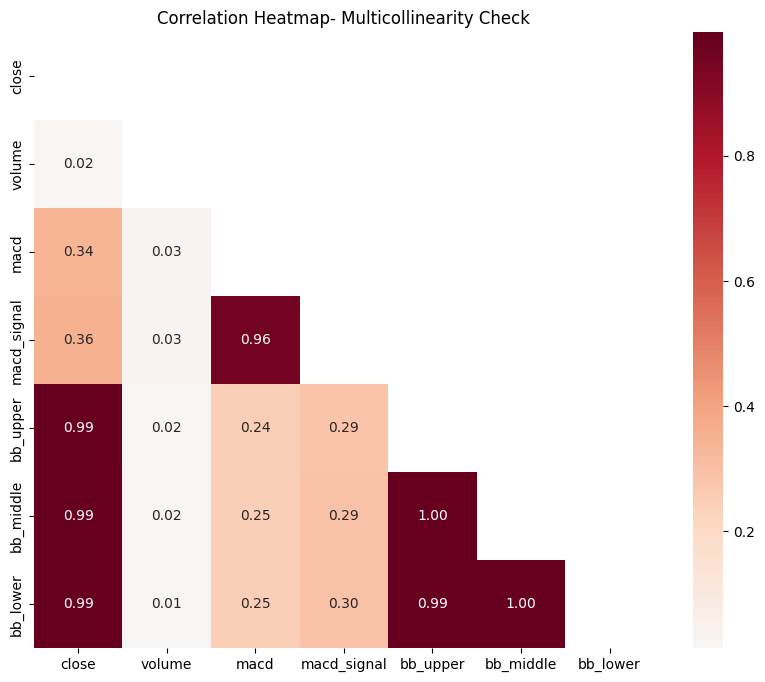

In [ ]:
plt.figure(figsize= (10,8))
mask=np.triu(np.ones_like(corr_matrix,dtype= bool))
sns.heatmap(corr_matrix,mask=mask, annot=True, cmap='RdBu_r', center=0, fmt='.2f')
plt.title('Correlation Heatmap- Multicollinearity Check')
plt.show()


In [ ]:
# identify high correlation (Potential multicollinearity)

In [ ]:
print("=== HIGH CORRELATIONS (Potential Multicollinearity===")
high_corr_pairs=[]
for i in range(len(corr_matrix.columns)):
 for j in range(i+1, len(corr_matrix.columns)):
    if abs(corr_matrix.iloc[i,j])>0.8: #Threshhold for high correlation
        high_corr_pairs.append((
            corr_matrix.columns[i],
            corr_matrix.columns[j],
            corr_matrix.iloc[i,j]
        ))
        # sort by absolute correlation strength
        high_corr_pairs.sort(key=lambda x:abs(x[2]), reverse =True)
        for pair in high_corr_pairs:
            print(f"{pair[0]}vs{pair[1]}:{pair[2]:.3f}")
        

=== HIGH CORRELATIONS (Potential Multicollinearity===
closevsbb_upper:0.990
closevsbb_middle:0.992
closevsbb_upper:0.990
closevsbb_middle:0.992
closevsbb_upper:0.990
closevsbb_lower:0.989
closevsbb_middle:0.992
closevsbb_upper:0.990
closevsbb_lower:0.989
macdvsmacd_signal:0.962
bb_uppervsbb_middle:0.997
closevsbb_middle:0.992
closevsbb_upper:0.990
closevsbb_lower:0.989
macdvsmacd_signal:0.962
bb_uppervsbb_middle:0.997
closevsbb_middle:0.992
closevsbb_upper:0.990
closevsbb_lower:0.989
bb_uppervsbb_lower:0.987
macdvsmacd_signal:0.962
bb_uppervsbb_middle:0.997
bb_middlevsbb_lower:0.996
closevsbb_middle:0.992
closevsbb_upper:0.990
closevsbb_lower:0.989
bb_uppervsbb_lower:0.987
macdvsmacd_signal:0.962


In [ ]:
#Prepare Data for Modelling

In [ ]:
import pandas as pd


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("cleaned_data.csv")

In [ ]:
print(x.columns)

Index(['open', 'high', 'low', 'close', 'volume', 'adjusted_close', 'sma_20',
       'sma_50', 'sma_200', 'ema_12', 'ema_26', 'macd', 'macd_signal',
       'macd_histogram', 'rsi_14', 'bb_middle', 'bb_upper', 'bb_lower',
       'bb_width', 'true_range', 'atr_14', 'volume_sma_20', 'volume_ratio',
       'momentum_10', 'momentum_20', 'price_to_sma_50', 'volatility_20'],
      dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


In [ ]:
# Target Variable

In [ ]:
y=df['trend_label']

In [ ]:
x =df.select_dtypes(include=['number']).drop(['future_return_5d'],axis=1, errors ='ignore')

In [ ]:
#remove null values from both x and y

In [ ]:
x=x[~y.isnull()]

In [ ]:
y = y[~y. isnull()]

In [ ]:
# split into train and test sets

In [ ]:
x_train, x_test,y_train, y_test =train_test_split(x,y, test_size=0.3, random_state=42)
                                                

In [ ]:
#scale the features

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# train model with scaled data

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(x_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [ ]:
# predict and evaluate

In [ ]:
y_pred= model.predict(x_test_scaled)

In [ ]:
# calculate accuracy

In [ ]:
accuracy=accuracy_score(y_test,y_pred)

In [ ]:
# calculate confusion matrix

In [ ]:
cm= confusion_matrix(y_test,y_pred)

In [ ]:
# plot accuracy on ax1

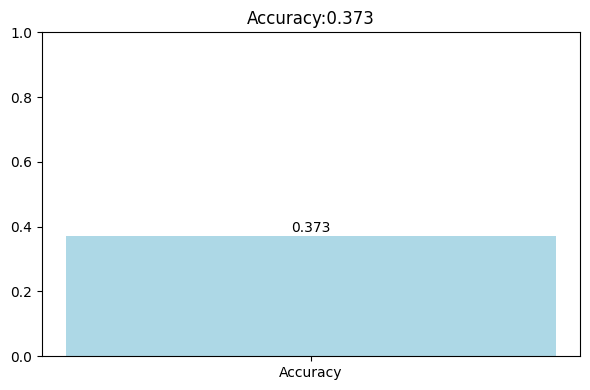

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(['Accuracy'],[accuracy], color = 'lightblue')
plt.ylim(0,1)
plt.title(f'Accuracy:{accuracy:.3f}')
for i, v in enumerate([accuracy]):
    plt.text(i,v + 0.01, f'{v:.3f}',ha='center')
    plt.tight_layout()
    plt.show()

In [ ]:
# plot confusion matrix on ax2

c:\Users\maryn\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.draw()


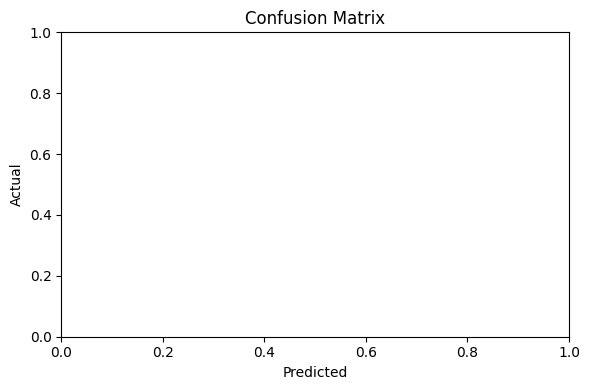

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True,fmt='d',ax=ax2,cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [ ]:
# print additional metrics

In [ ]:
print(f"Accuracy:{accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy:0.373

Classification Report:
              precision    recall  f1-score   support

   Downtrend       0.42      0.24      0.31      1347
    Sideways       0.36      0.34      0.35      1273
     Uptrend       0.37      0.52      0.43      1476

    accuracy                           0.37      4096
   macro avg       0.38      0.37      0.36      4096
weighted avg       0.38      0.37      0.36      4096



In [ ]:
# Accuracy is low 

In [ ]:
#Build a more sophisticated model to improve prediction accuracy

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [129]:
# prepare features and target
y= df['trend_label']
x=df.select_dtypes(include=['number']).drop (['future_return_5d'],axis=1, errors='ignore')

In [ ]:
# Remove null values
x=x[~y. isnull()]
y=y[~y. isnull()]

In [ ]:
# Split into train and test sets
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
# RandomForestClassifier- No scaling needed for tree-based models

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators =100,       #number of trees
    max_depth=10,            # max depth of trees
    min_samples_split=5,  #minimum samples required to split
    min_samples_leaf=2,     # minimum samples required at leaf node
    random_state = 42
)
    

In [ ]:
# Train the Model
rf_model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Predictions

In [ ]:
y_pred_rf = rf_model.predict(x_test)
y_pred_proba_rf = rf_model.predict_proba(x_test)  # probability scores

In [ ]:
# Evaluate

In [ ]:
accuracy_rf = accuracy_score(y_test,y_pred_rf)

In [ ]:
# Compare with Logistic Regression
# from sklearn.linear_model import Logistic Regression
#lr_model = LogisticRegression(max_iter =1000)
#lr_model.fit(x_train, y_train)
#y_pred_lr = lr_model.predict(x_test)
# accuracy_lr = accuracy_score(y_test, y_pred_lr)

In [ ]:
# Create Visualizations

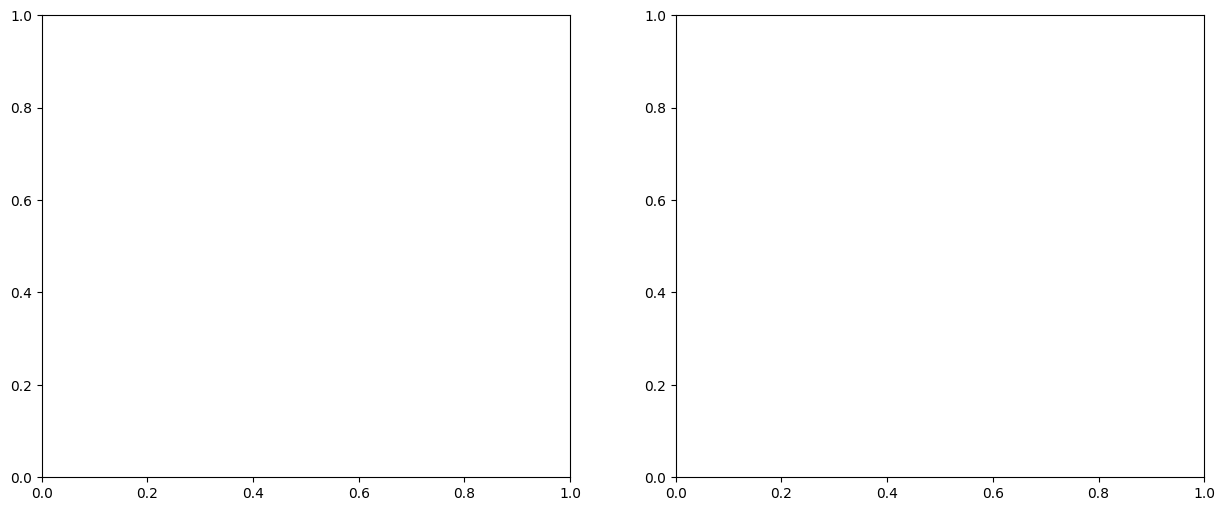

In [ ]:
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(15,6))

In [ ]:
# Confusion Matrix

In [ ]:
cm_rf= confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm_rf, annot = True,fmt='d', cmap = 'Blues',ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title('RandomForest - Confusion Matrix')
 

Text(0.5, 1.0, 'RandomForest - Confusion Matrix')

In [ ]:
# Accuracy Comparison

In [ ]:
model = ['Random Forest'] # Add'Logistic Regression if comparing
accuracies=[accuracy_rf] # add accuracy_lr if comparing
bars = ax2.bar(model, accuracies, color = ['lightgreen', 'lightblue'])
ax2.set_ylim(0,1)
ax2.set_title('Model Accuracy Comparison')
ax2.set_ylabel('Accuracy')
# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax2.text(bar.get_x()+bar.get_width()/2, height+0.01,
    f'{acc:.3f}',ha = 'center', va = 'bottom')
    plt.tight_layout()
    plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
# print detailed metrics

In [ ]:
print(f"Random Forest Accuracy:{accuracy_rf:.3f}")
print ( classification_report(y_test, y_pred_rf))
      

Random Forest Accuracy:0.500
              precision    recall  f1-score   support

   Downtrend       0.60      0.41      0.49      1347
    Sideways       0.42      0.42      0.42      1273
     Uptrend       0.50      0.65      0.57      1476

    accuracy                           0.50      4096
   macro avg       0.51      0.49      0.49      4096
weighted avg       0.51      0.50      0.50      4096



In [ ]:
# Feature importance

In [ ]:
feature_importance = rf_model.feature_importances_
feature_names = x.columns

In [ ]:
# sort features by importance
indices = np.argsort(feature_importance)[::- 1]
print("\ntop 10 most important features:")
for i in range(min(10, len(feature_names))):
    print(f"{i+1}.{feature_names[indices[i]]}:{feature_importance[indices[i]]:.4f}")



top 10 most important features:
1.volatility_20:0.0744
2.sma_200:0.0518
3.atr_14:0.0503
4.volume_sma_20:0.0486
5.bb_width:0.0446
6.macd_signal:0.0446
7.sma_50:0.0435
8.price_to_sma_50:0.0402
9.macd_histogram:0.0393
10.macd:0.0389


In [ ]:
# plot feature importance

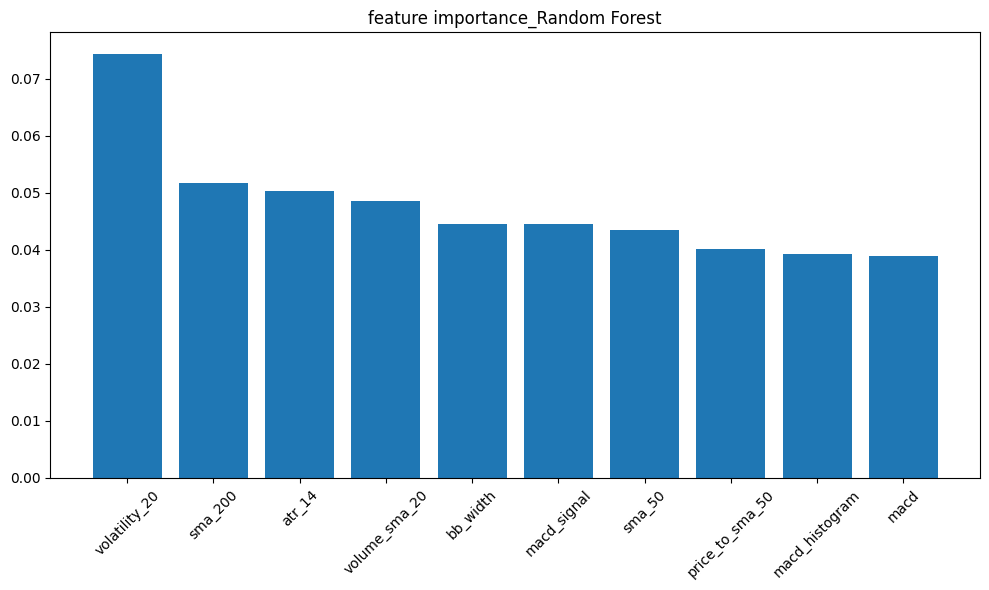

In [ ]:
plt.figure(figsize = (10,6))
plt.title("feature importance_Random Forest")
plt.bar(range(10), feature_importance[indices][:10])
plt.xticks(range(10),[feature_names[i] for i in indices[:10]], rotation = 45)
plt.tight_layout()
plt.show()

In [ ]:
# Volatility- related indicators(volatility_20,ATR, Bollinger width) are the strongest predictors
# long_term trend(sma_200)is more important than short-term(sma-50)
# MACD-based indicators are less influential for this particular  preiction task
#Volume features provide moderate value

In [ ]:
#invariably sma_200(200_day moving average), followed by atr_14(average true range, 14-day) and volume_sma_20 are the top 3 features
# for prediction.
#The lower- ranked features still contribute but less; these are 
#price_to_sma_50
#macd_histogram
#macd

In [ ]:
# Use GridSearchCV to optimize:

In [130]:

import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
# x,y = your_features, your _target
# split the data

In [132]:
y = df['trend_label']
x = df.select_dtypes(include=['number']).drop(['future_return_5d'], axis=1, errors='ignore')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [133]:
# Define parameters grid with specified parameters

In [134]:
param_grid = {
'n_estimators':[50,100,200],
'max_depth':[10,20,30],
'min_samples_split':[2,5,10],
}
#use 3_fold cross-validation
#select best parameters based on accuracy

In [135]:
# create random forest model

In [136]:
rf = RandomForestClassifier(random_state=42)

In [137]:
# initialize GridSearchCV with 3-fold cross_validation

In [138]:
grid_search = GridSearchCV(
    estimator = rf,
    param_grid = param_grid,
    cv=3,           # 3-fold cross validation
    scoring = 'accuracy',  # select best parameters based on accuracy
    n_jobs = -1,
    verbose = 1,       # show progress
    return_train_score = True   # Return training scores for analysis
     )

In [139]:
# fit GridSearchCV
print("starting GridSearchCV...")
grid_search.fit(x_train,y_train)
print("GridSearchCV completed:")

starting GridSearchCV...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
GridSearchCV completed:


In [140]:
# Best parameters and score
print("\n" +"=" * 50),
print("GRIDSEARCHCV RESULTS"),
print("=" *50),
print(f"Best parameters:{grid_search.best_params_}"),
print(f"Best Cross- Validation accuracy:{grid_search.best_score_:.4f}"),
print(f"Best estimator:{grid_search.best_estimator_}"),


GRIDSEARCHCV RESULTS
Best parameters:{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross- Validation accuracy:0.5686
Best estimator:RandomForestClassifier(max_depth=30, n_estimators=200, random_state=42)


(None,)

In [141]:
# evaluate on test set 
print ('"\ n "' + " = " *50)
print("TEST SET EVALUATION")
print ("="*50)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"test accuracy: {test_accuracy:.4f}")
print("\nclassification report:")
print(classification_report(y_test,y_pred))

<>:2: SyntaxWarning: invalid escape sequence '\ '
<>:2: SyntaxWarning: invalid escape sequence '\ '
C:\Users\maryn\AppData\Local\Temp\ipykernel_14636\2853836198.py:2: SyntaxWarning: invalid escape sequence '\ '
  print ('"\ n "' + " = " *50)


"\ n " =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
TEST SET EVALUATION
test accuracy: 0.6412

classification report:
              precision    recall  f1-score   support

   Downtrend       0.69      0.68      0.69       888
    Sideways       0.53      0.51      0.52       854
     Uptrend       0.69      0.72      0.70       989

    accuracy                           0.64      2731
   macro avg       0.64      0.64      0.64      2731
weighted avg       0.64      0.64      0.64      2731



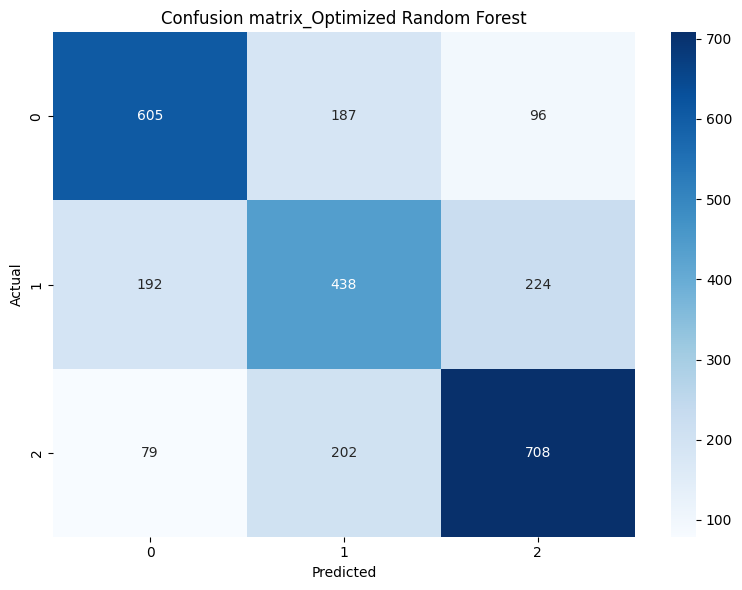

In [ ]:
# Confusion matrix
plt.figure(figsize=(8,6))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap = 'Blues')
plt.title('Confusion matrix_Optimized Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [143]:
# convert results to DataFrame for analysis
results_df= pd.DataFrame(grid_search.cv_results_)

In [144]:
# Display top 10 parameter combinations
print("\n Top 10 parameter combinations:")
top_results = results_df.nlargest(10,'mean_test_score')
[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'mean_test_score', 'std_test_score']]
print(top_results.to_string(index= False))


 Top 10 parameter combinations:
 mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_max_depth  param_min_samples_split  param_n_estimators                                                          params  split0_test_score  split1_test_score  split2_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  mean_train_score  std_train_score
     28.032748      0.417525         0.300884        0.003849               30                        2                 200  {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}           0.576765           0.572370           0.556593         0.568576        0.008661                1            1.000000            1.000000            1.000000          1.000000         0.000000
     28.070013      0.656178         0.342747        0.076395               30                        5                 200  {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 200}

In [145]:
# Visualizations of results
plt.figure(figsize = (12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

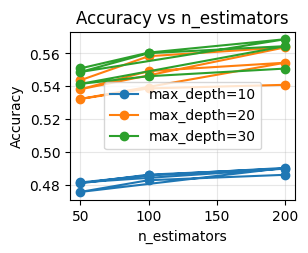

In [146]:
# n_estimators vs Accuracy
plt.subplot(2,2,1)
for depth in param_grid['max_depth']:
    mask = results_df['param_max_depth']==depth
    plt.plot(results_df[mask]['param_n_estimators'],
            results_df[mask]['mean_test_score'], 
            'o-', label=f"max_depth={depth}")
    plt.xlabel('n_estimators')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs n_estimators')
    plt.legend()
    plt.grid(True,alpha =0.3)



    

In [147]:
print("\n" + "=" * 50)
print("FINAL MODEL SUMMARY")
print("="*50)
print(f"Best parameters found: {grid_search.best_params_}")
print(f" cross-validation accuracy:{grid_search.best_score_:.4f}")
print(f"Test set Accuracy:{test_accuracy:.4f}")
print(f"number of features:{x.shape[1]}")
print(f" Training set size:{x_train.shape[0]}")
print(f" Test set size:{x_test.shape[0]}")


FINAL MODEL SUMMARY
Best parameters found: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
 cross-validation accuracy:0.5686
Test set Accuracy:0.6412
number of features:27
 Training set size:10922
 Test set size:2731


In [148]:
# save the best model

In [ ]:
import joblib

In [149]:
joblib.dump(best_model, 'optimized_random_forest_model.pkl')
print("optimized model saved")


optimized model saved
